# Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# Importar train data

In [11]:
df = pd.read_csv(f"./Data/telecom_churn_TRAINTEST.csv")
df_predecir = pd.read_csv('./Data/telecom_churn_PREDICT.csv')
diccionario = pd.read_csv('./Data/variable_dictionary.csv')

# EDA: Analisis Exploratorio

In [12]:
diccionario.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Variable,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
Description,Mean monthly revenue (charge amount),Mean number of monthly minutes of use,Mean total monthly recurring charge,Mean number of directory assisted calls,Mean overage minutes of use,Mean overage revenue,Mean revenue of voice overage,Mean revenue of data overage,Mean number of roaming calls,Percentage change in monthly minutes of use v...,Percentage change in monthly revenue vs previ...,Mean number of dropped (failed) voice calls,Mean number of dropped (failed) data calls,Mean number of blocked (failed) voice calls,Mean number of blocked (failed) data calls,Mean number of unanswered voice calls,Mean number of unanswered data calls,Mean number of attempted voice calls placed,Mean number of attempted data calls placed,Mean number of received voice calls,Mean number of received sms,Mean number of completed voice calls,Mean number of completed data calls,Mean number of customer care calls,Mean rounded minutes of use of customer care ...,Mean unrounded minutes of use of customer car...,Mean number of inbound calls less than one mi...,Mean number of three way calls,Mean unrounded minutes of use of completed vo...,Mean unrounded minutes of use of completed da...,Mean unrounded minutes of use of received voi...,Mean number of outbound wireless to wireless ...,Mean unrounded minutes of use of outbound wir...,Mean number of inbound wireless to wireless v...,Mean unrounded minutes of use of inbound wire...,Mean number of inbound and outbound peak voic...,Mean number of peak data calls,Mean unrounded minutes of use of peak voice c...,Mean unrounded minutes of use of peak data calls,Mean number of off-peak voice calls,Mean number of off-peak data calls,Mean unrounded minutes of use of off-peak voi...,Mean unrounded minutes of use of off-peak dat...,Mean number of dropped or blocked calls,Mean number of attempted calls,Mean number of completed calls,Mean number of call forwarding calls,Mean number of call waiting calls,Instance of churn between 31-60 days after ob...,Total number of months in service,Number of unique subscribers in the household,Number of active subscribers in household,New cell phone user,Credit class code,Account spending limit,Total number of calls over the life of the cu...,Total minutes of use over the life of the cus,Total revenue,Billing adjusted total revenue over the life ...,Billing adjusted total minutes of use over th...,Billing adjusted total number of calls over t...,Average monthly revenue over the life of the ...,Average monthly minutes of use over the life ...,Average monthly number of calls over the life...,Average monthly minutes of use over the previ...,Average monthly number of calls over the prev...,Average monthly revenue over the previous thr...,Average monthly minutes of use over the previ...,Average monthly number of calls over the prev...,Average monthly revenue over the previous s

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

### Miramos la info de los tipo object

In [14]:
df.describe(include=object).T

,count,unique,top,freq
new_cell,90000,3,U,58812
crclscod,90000,54,AA,34152
asl_flag,90000,2,N,79401
prizm_social_one,83463,5,S,29203
area,89960,19,NEW YORK CITY AREA,10293
dualband,89999,4,Y,65977
refurb_new,89999,2,N,76624
hnd_webcap,80481,3,WCMB,67396
ownrent,60509,2,O,58729
dwlltype,62022,2,S,44521


### Miramos la info de los tipo number

In [ ]:
df.describe(include=np.number)

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89405.000000,89405.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,88593.000000,88593.000000,88593.000000,89296.000000,89999.000000,89999.000000,88549.000000,88549.000000,63498.000000,69967.000000,67804.000000,46432.000000,88549.000000,89999.000000,9.000000e+04
mean,58.312895,504.277946,45.880669,0.877813,40.798976,13.289932,13.046046,0.240786,1.308197,-13.786987,-1.074666,5.769639,0.037837,3.999448,0.019737,26.843561,0.027811,141.375341,0.805435,53.713298,0.047781,106.483091,0.720050,1.648754,4.344852,3.444618,28.909037,0.269522,221.363949,1.689888,109.071366,24.268663,27.785579,7.712004,17.676245,86.999369,0.334957,171.309285,0.654335,64.103954,0.385096,159.080481,1.035109,9.826661,142.180776,107.203141,0.010415,1.732817,0.508889,19.263856,1.555067,1.366522,2970.669433,7874.976570,1065.717715,994.546384,7776.807032,2931.320344,57.288343,472.052308,170.568866,510.539844,178.227000,58.802889,501.598490,176.320082,58.266691,99.709575,1.802987,1.556184,0.197190,0.086867,6.180856,2.538197,5.809274,1.568896,0.059255,402.419438,1.045000e+06
std,46.084103,516.170057,23.370435,2.173665,96.970619,30.123282,29.719581,3.012631,15.374215,271.624916,50.565668,8.673272,0.885448,10.603489,0.699317,37.315217,0.501246,155.486573,8.455179,85.537833,2.176283,116.845898,7.679230,5.148484,12.141729,10.049161,54.960177,1.003104,257.220079,21.905864,160.081469,33.913196,47.948938,15.908932,40.382222,102.308064,3.890521,205.794020,7.335297,89.736523,4.393926,228.966797,16.988064,15.081650,156.468555,117.776670,0.465963,5.260407,0.499924,9.149764,1.095305,0.661085,3887.921200,8869.646079,865.305299,851.715318,8802.189472,3855.692056,35.430616,425.257319,165.134394,524.737209,191.398108,46.476204,489.911616,181.593174,40.483529,60.788920,1.319121,0.900798,0.397879,0.281642,4.741242,1.452650,2.176928,0.628308,0.236103,252.821660,2.598091e+04
min,-5.862500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,23.750000,9.320000,0.000000,0.000000,2.910000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,9.989998,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,3

### Vemos de forma gráfica la representación de los nulos en mi dataset de training

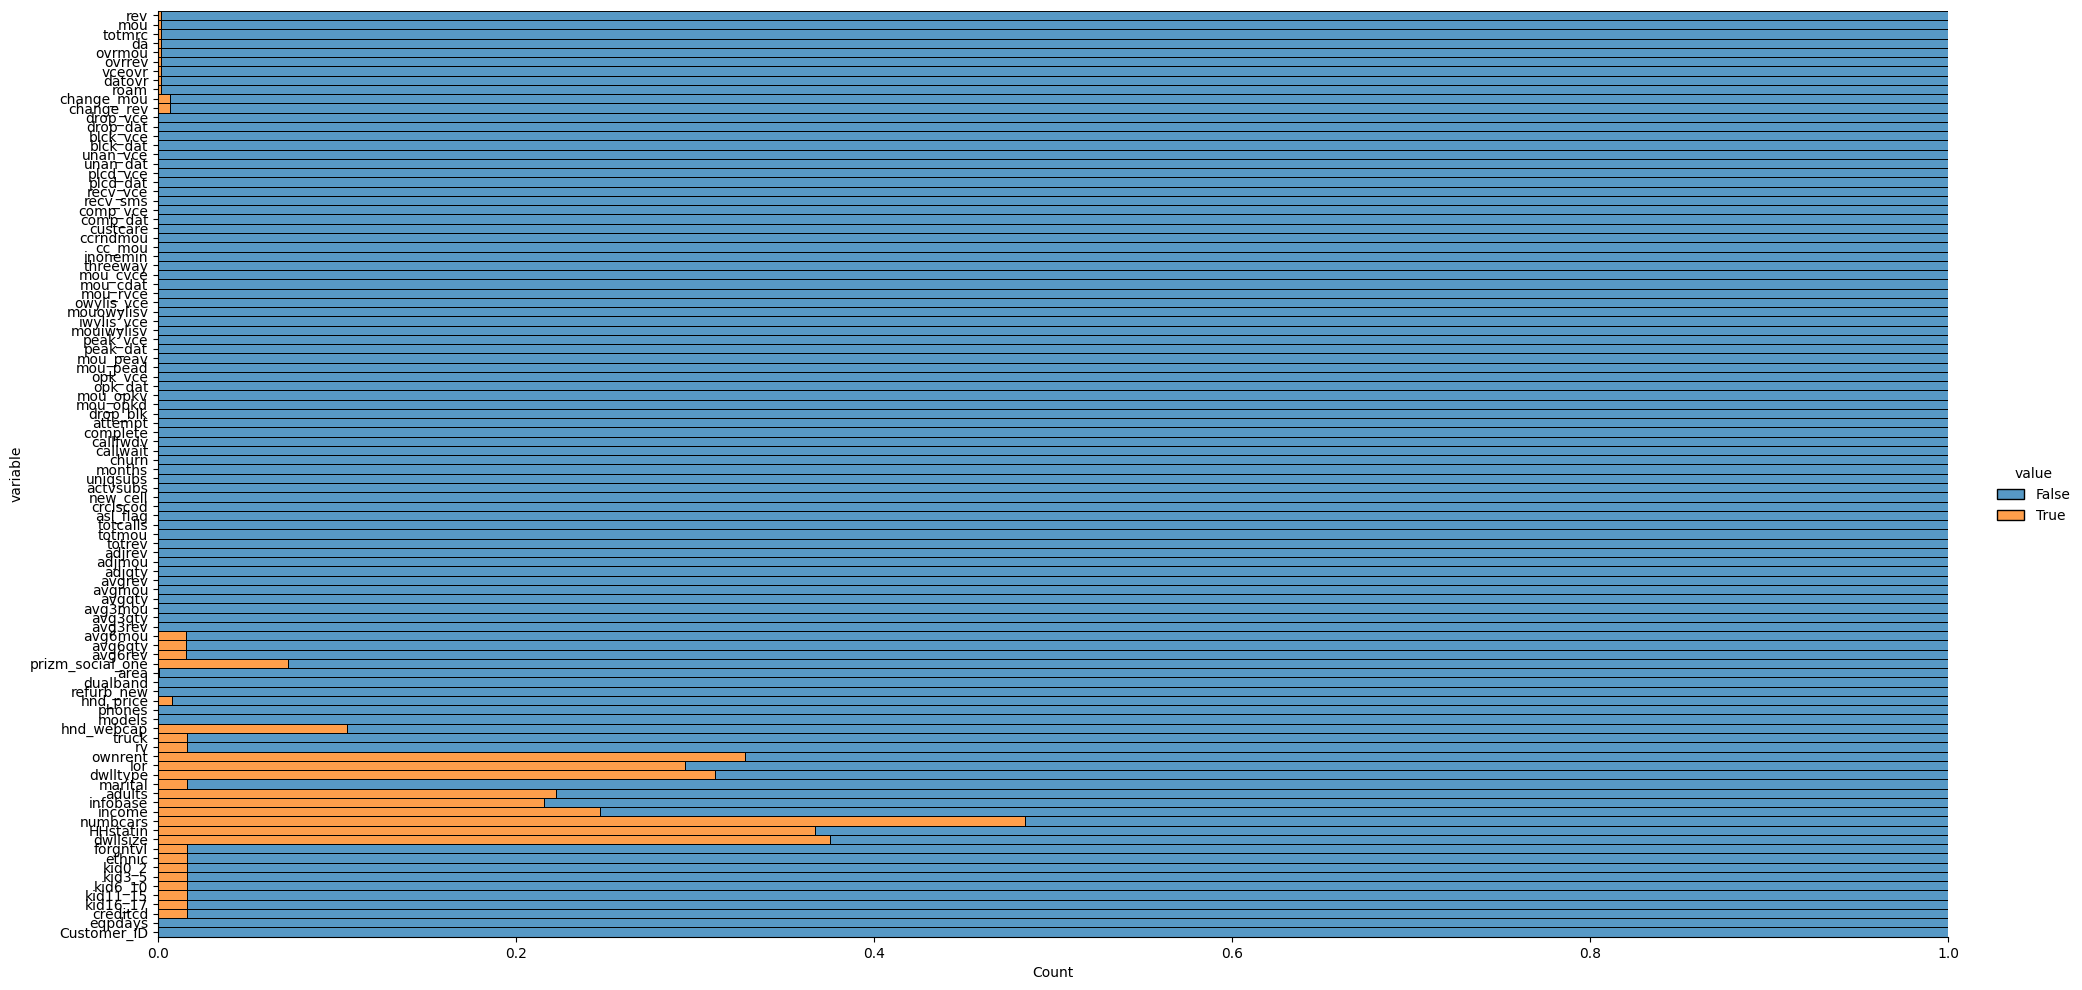

In [15]:
df.isnull().melt().pipe(lambda df: (sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2,height=10
)));

### Vemos de forma gráfica la representación de los nulos en mi dataset de predict

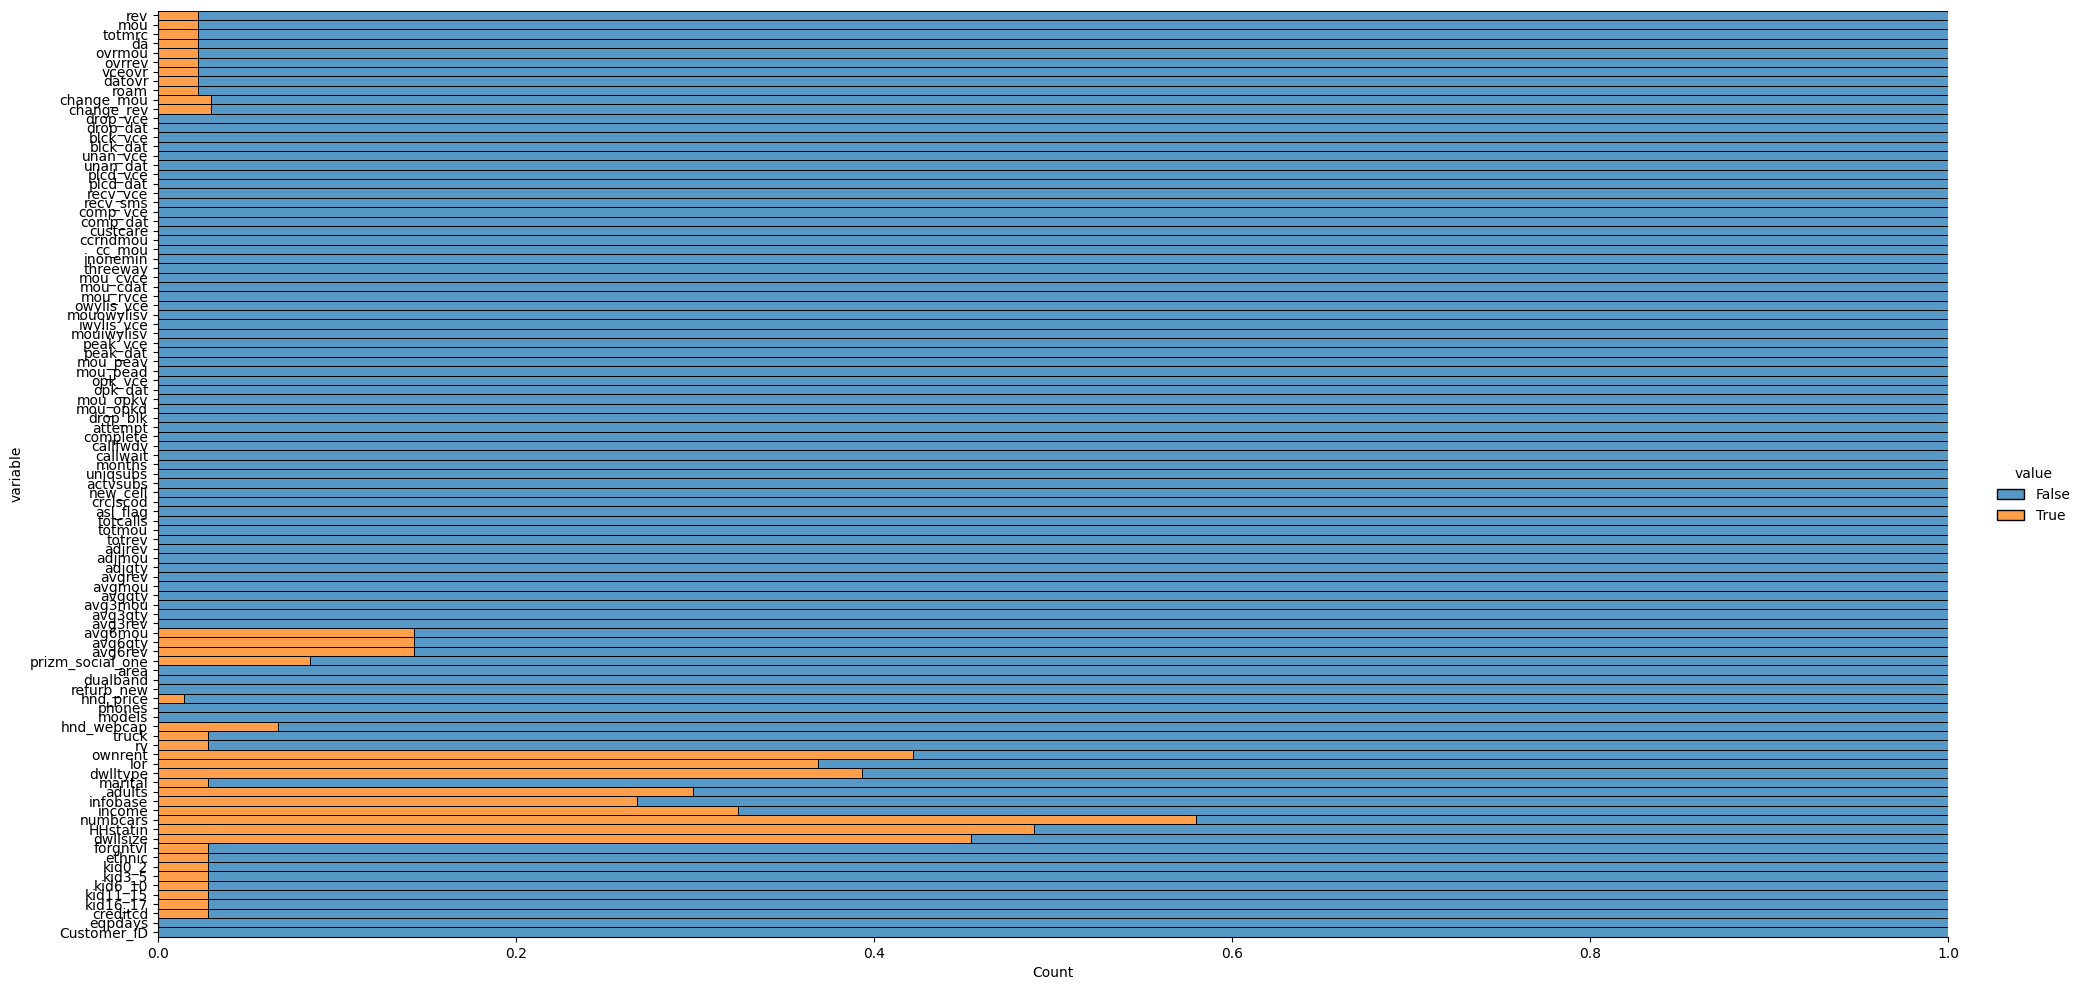

In [ ]:
df_predecir.isnull().melt().pipe(lambda df: (sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2,height=10
)));

## Visualizando el porcentaje de nulos, observo que existen 4 columnas que tienes mas del 40% nulos, avamos a examinarlas para decidir que hacer

In [20]:
df_predecir["numbcars"].isnull().sum()/len(df_predecir["numbcars"])*100

np.float64(57.98)

In [19]:
df["numbcars"].isnull().sum()/len(df["numbcars"])*100

np.float64(48.40888888888889)

### vamos a rellenar los nulos con 0, ya que se entiende que estos son los usuarios que no tienen coche

In [25]:
df["numbcars"].fillna(0,inplace=True)
df_predecir["numbcars"].fillna(0,inplace=True)

In [27]:
df["HHstatin"].isnull().sum()/len(df["HHstatin"])*100

np.float64(36.702222222222225)

In [28]:
df["HHstatin"].value_counts(normalize=True)

HHstatin
C    0.633566
I    0.199849
A    0.073620
B    0.051046
G    0.027349
H    0.014570
Name: proportion, dtype: float64

### rellenamos en la misma proporcion

In [33]:
def fill_na_with_proportion(df, column):
    """
    Rellena los valores nulos en una columna de un DataFrame 
    siguiendo las proporciones de los valores existentes.
    
    Args:
        df (pd.DataFrame): DataFrame que contiene la columna.
        column (str): Nombre de la columna objetivo.
    
    Returns:
        pd.DataFrame: DataFrame con los nulos rellenados.
    """
    # Calcular la proporción de cada valor no nulo
    proportions = df[column].value_counts(normalize=True)
    
    # Obtener índices de los valores nulos
    null_indices = df[df[column].isnull()].index
    
    # Generar valores según las proporciones
    fill_values = np.random.choice(
        proportions.index, 
        size=len(null_indices), 
        p=proportions.values
    )
    
    # Rellenar los nulos con los valores generados
    df.loc[null_indices, column] = fill_values
    
    return df[column]

In [35]:
fill_na_with_proportion(df_predecir, "HHstatin")

0       C
1       C
2       C
3       I
4       C
       ..
9995    G
9996    I
9997    C
9998    C
9999    I
Name: HHstatin, Length: 10000, dtype: object

In [34]:
fill_na_with_proportion(df, "HHstatin")

0        C
1        C
2        C
3        C
4        C
        ..
89995    I
89996    I
89997    B
89998    I
89999    I
Name: HHstatin, Length: 90000, dtype: object

In [32]:
df["HHstatin"].isnull().sum()/len(df["HHstatin"])*100

np.float64(0.0)

In [38]:
df["ownrent"].isnull().sum()/len(df["ownrent"])*100

np.float64(32.76777777777778)

In [37]:
df["dwllsize"].value_counts(normalize=True)

dwllsize
A    0.766733
B    0.084341
C    0.024130
J    0.022761
O    0.019187
N    0.016093
D    0.012056
K    0.010580
E    0.008713
L    0.007984
F    0.006633
M    0.006117
G    0.005673
H    0.004712
I    0.004286
Name: proportion, dtype: float64

In [40]:
fill_na_with_proportion(df, "HHstatin")
fill_na_with_proportion(df_predecir, "HHstatin")
fill_na_with_proportion(df, "dwllsize")
fill_na_with_proportion(df_predecir, "dwllsize")
fill_na_with_proportion(df, "ownrent")
fill_na_with_proportion(df_predecir, "ownrent")

0       R
1       O
2       O
3       O
4       O
       ..
9995    O
9996    O
9997    O
9998    O
9999    O
Name: ownrent, Length: 10000, dtype: object

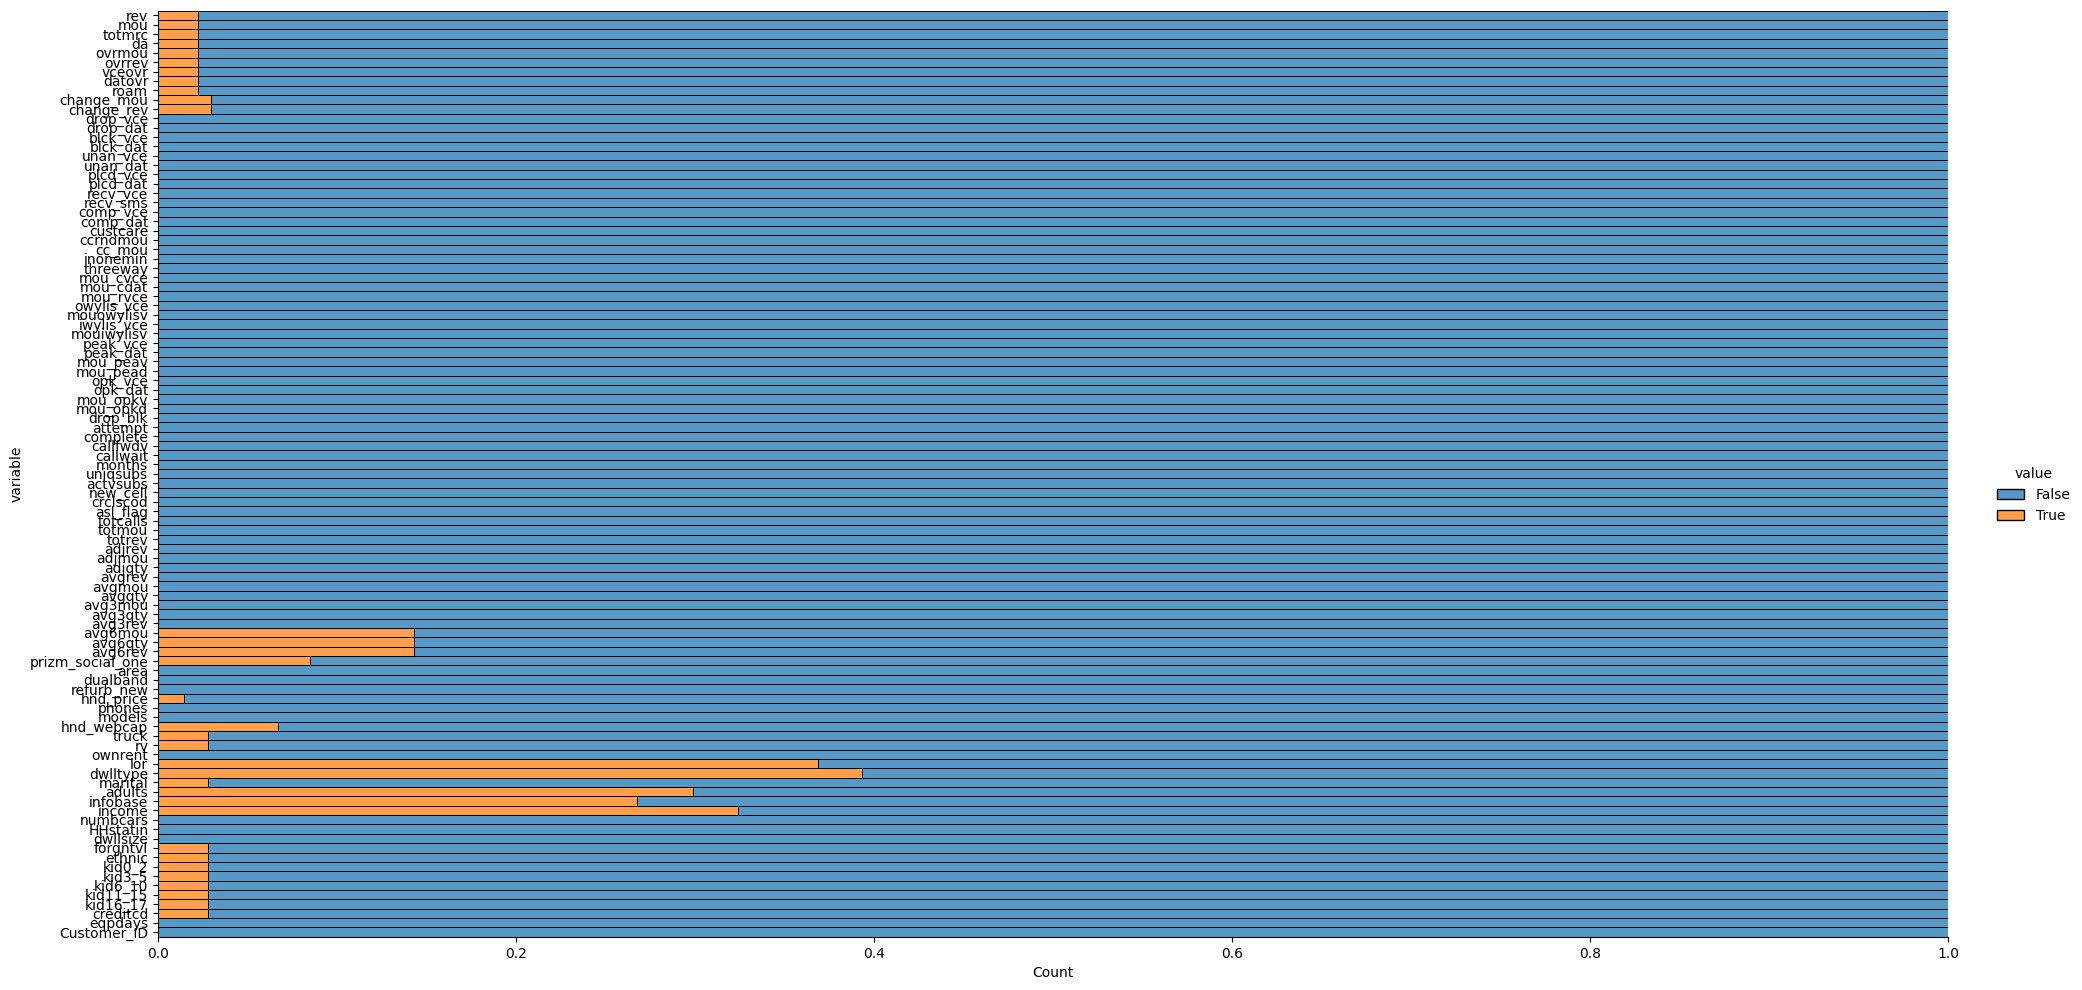

In [42]:
df_predecir.isnull().melt().pipe(lambda df: (sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2,height=10
)));

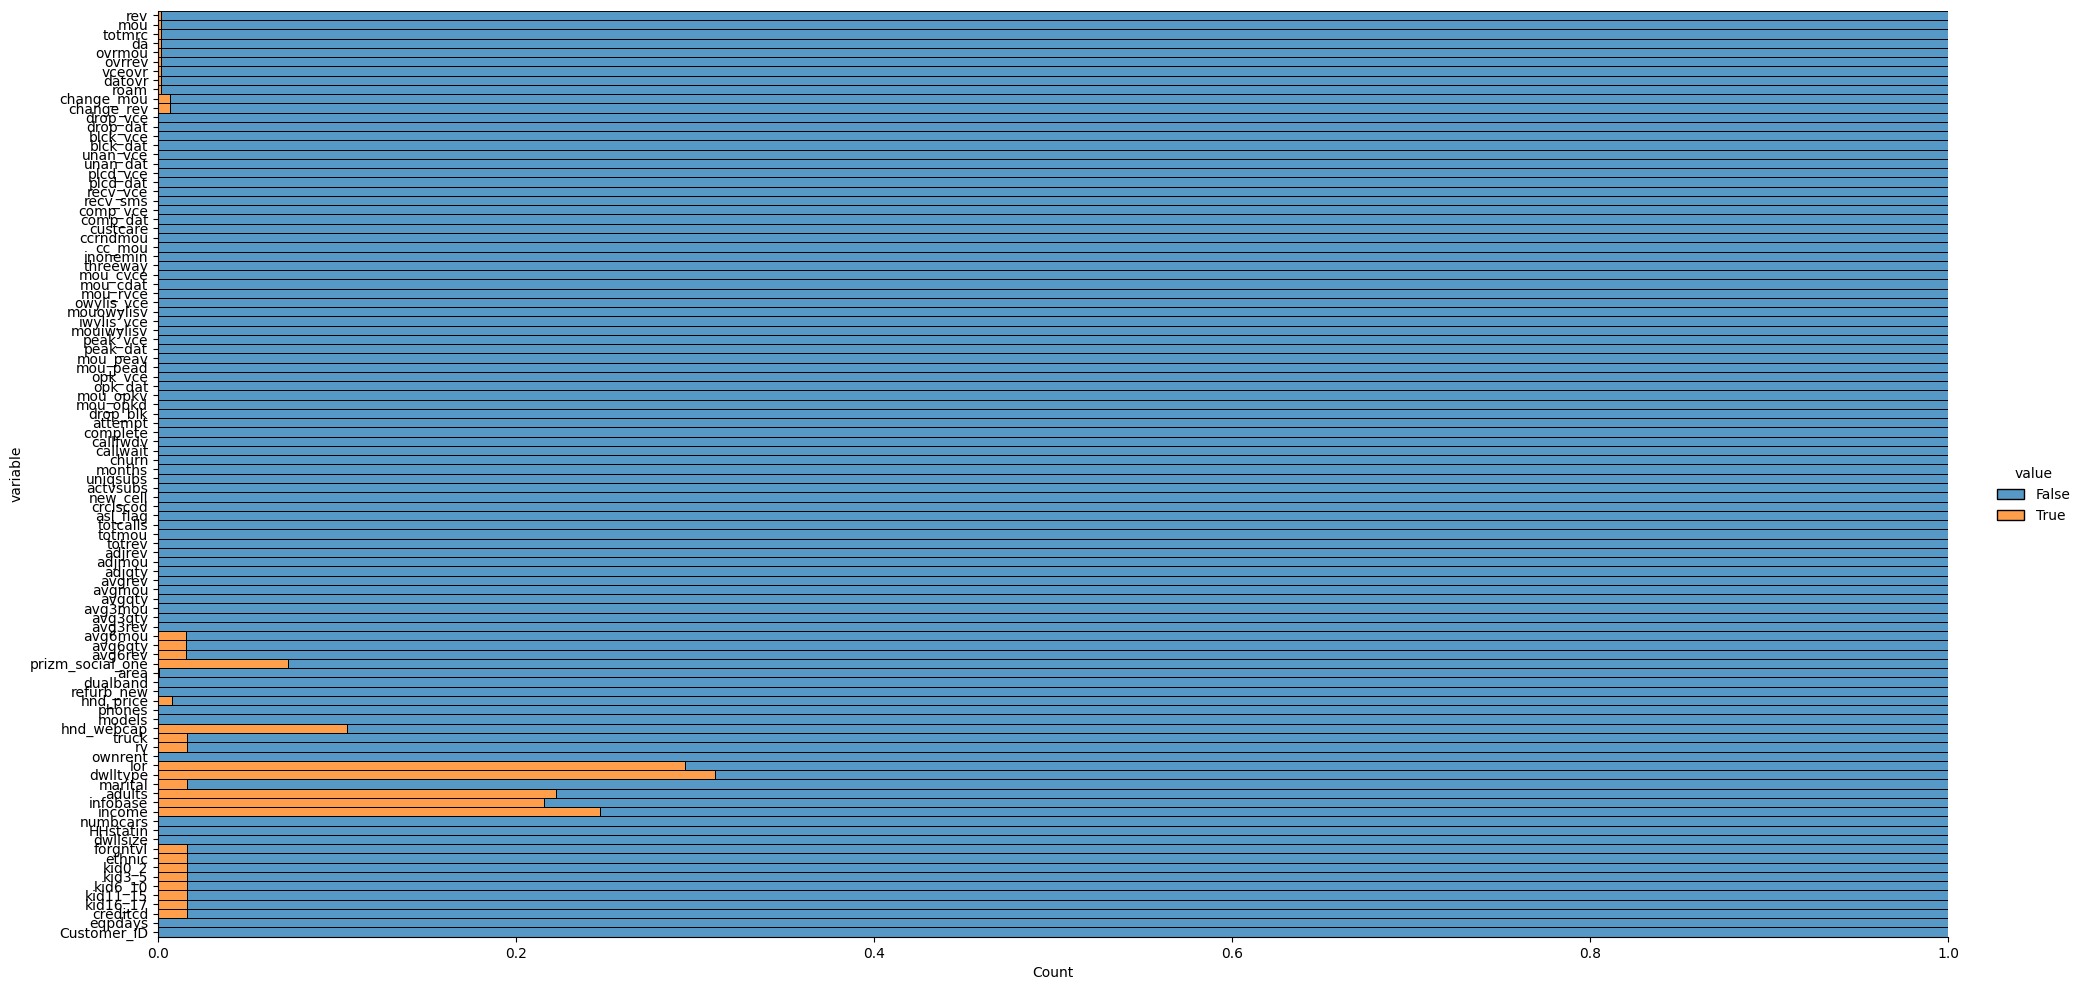

In [43]:
df.isnull().melt().pipe(lambda df: (sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2,height=10
)));

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [51]:
df.isnull().sum()

rev             134
mou             134
totmrc          134
da              134
ovrmou          134
               ... 
kid11_15       1451
kid16_17       1451
creditcd       1451
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

## Distribución del target

<Axes: xlabel='churn'>

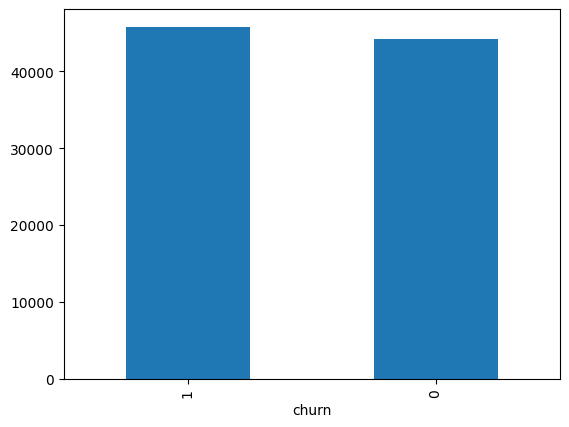

In [ ]:
df['churn'].value_counts().plot(kind='bar')

## Analisis Univariable

## Distribucion de cada variable

Creo una función para analizar cada variable de mi dataset

In [77]:
def analyze_variables(df, variables):
    results = {}
    for var in variables:
        results[var] = {
            'Unique values': df[var].unique(),
            'Unique num values': df[var].nunique(),
            'Null values': df[var].isnull().sum(),
            'Value counts (normalized)': df[var].value_counts(normalize=True)
        }
    return results

In [53]:
# Llamar a la función para realizar el análisis
analysis_results = analyze_variables(df, list(df.columns))

# Mostrar los resultados
for var, results in analysis_results.items():
    print(f"Análisis para la variable '{var}':")
    print(f"Unique values: {results['Unique values']}")
    print(f"Null values: {results['Null values']}")
    print(f"Value counts (normalized):\n{results['Value counts (normalized)']}\n")

Análisis para la variable 'rev':
Unique values: [ 23.9975  57.4925  16.99   ...  21.9475 125.27    72.745 ]
Null values: 134
Value counts (normalized):
rev
29.9900     0.022422
34.9900     0.013709
10.0000     0.009258
30.0000     0.008702
30.2600     0.007990
              ...   
120.6725    0.000011
70.4775     0.000011
115.9200    0.000011
16.6475     0.000011
103.9900    0.000011
Name: proportion, Length: 35160, dtype: float64

Análisis para la variable 'mou':
Unique values: [ 219.25  482.75   10.25 ... 1872.75 2556.   2022.25]
Null values: 134
Value counts (normalized):
mou
0.00       0.016614
0.25       0.001335
0.50       0.000935
0.75       0.000823
1.00       0.000746
             ...   
1779.50    0.000011
1163.25    0.000011
2004.75    0.000011
2246.25    0.000011
1692.50    0.000011
Name: proportion, Length: 9180, dtype: float64

Análisis para la variable 'totmrc':
Unique values: [22.5    37.425  16.99   ... 24.29   40.3125 34.965 ]
Null values: 134
Value counts (normalized

## Analisis Variable-Target

* Relacion target-variable

In [ ]:
# lo hacemos mas abajo


# Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

### Comprobamos si hay filas duplicadas

In [54]:
df.duplicated(keep=False).value_counts() # no hay duplicados[]
df_predecir[df_predecir.duplicated(keep=False)]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID


### Aplicamos funcion para eliminar las filas de las columnas que tenga un numero de nulos inferior al 3%

In [55]:
for i in df.columns:
    if (df[i].isnull().sum() / len(df)) < 0.03:
        df.dropna(subset=[i], inplace=True)

In [56]:
df.shape

(85925, 100)

### Eliminamos las filas de las columnas que presentan menos de 3% de nulos.


In [58]:
for i in df_predecir.columns:
    if (df_predecir[i].isnull().sum() / len(df_predecir)) < 0.03:
        df_predecir.dropna(subset=[i], inplace=True)

In [60]:
df_predecir.shape

(9297, 99)

### vemos de nuevo graficamente las columnas restantes y creamos una lista con ellas

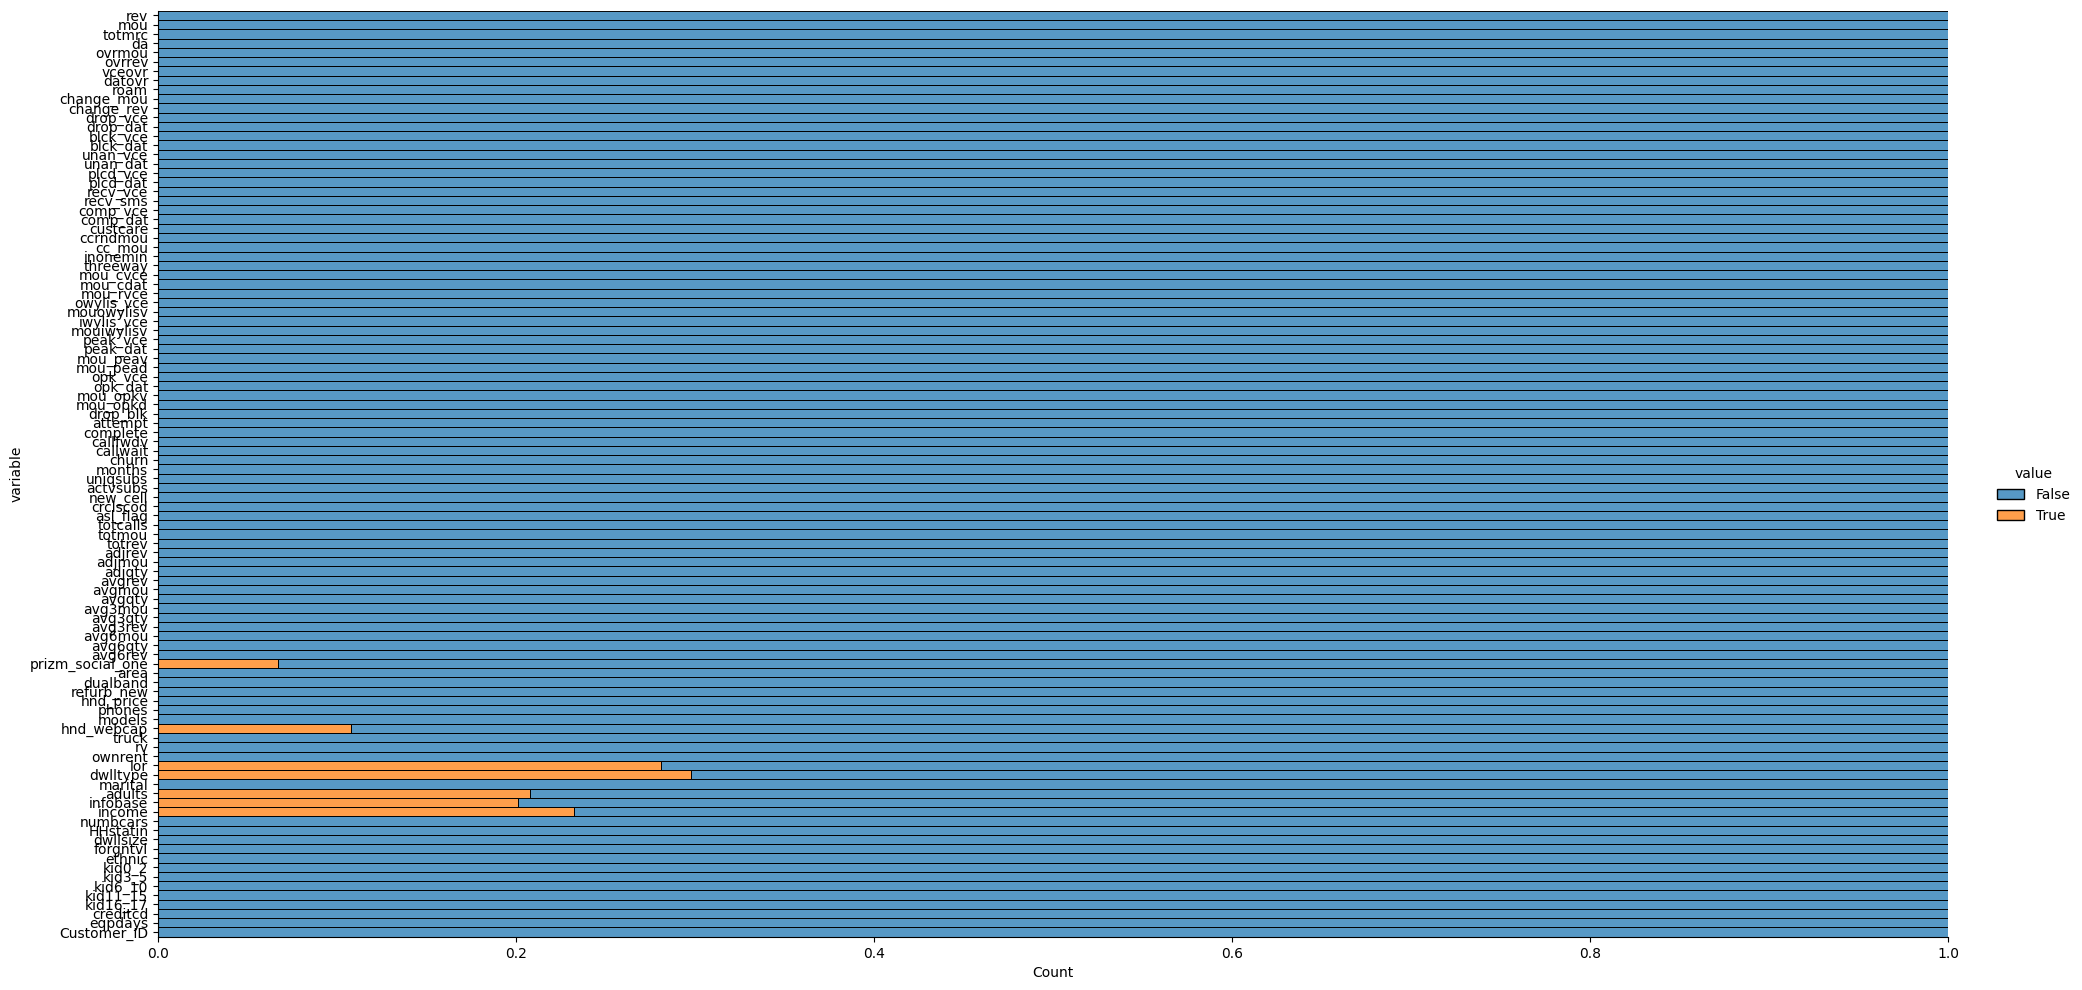

In [61]:
#Visualizamos la proporción de nulos existentes en nuestro Dataset
df.isnull().melt().pipe(lambda df: (sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2, height=10
)));

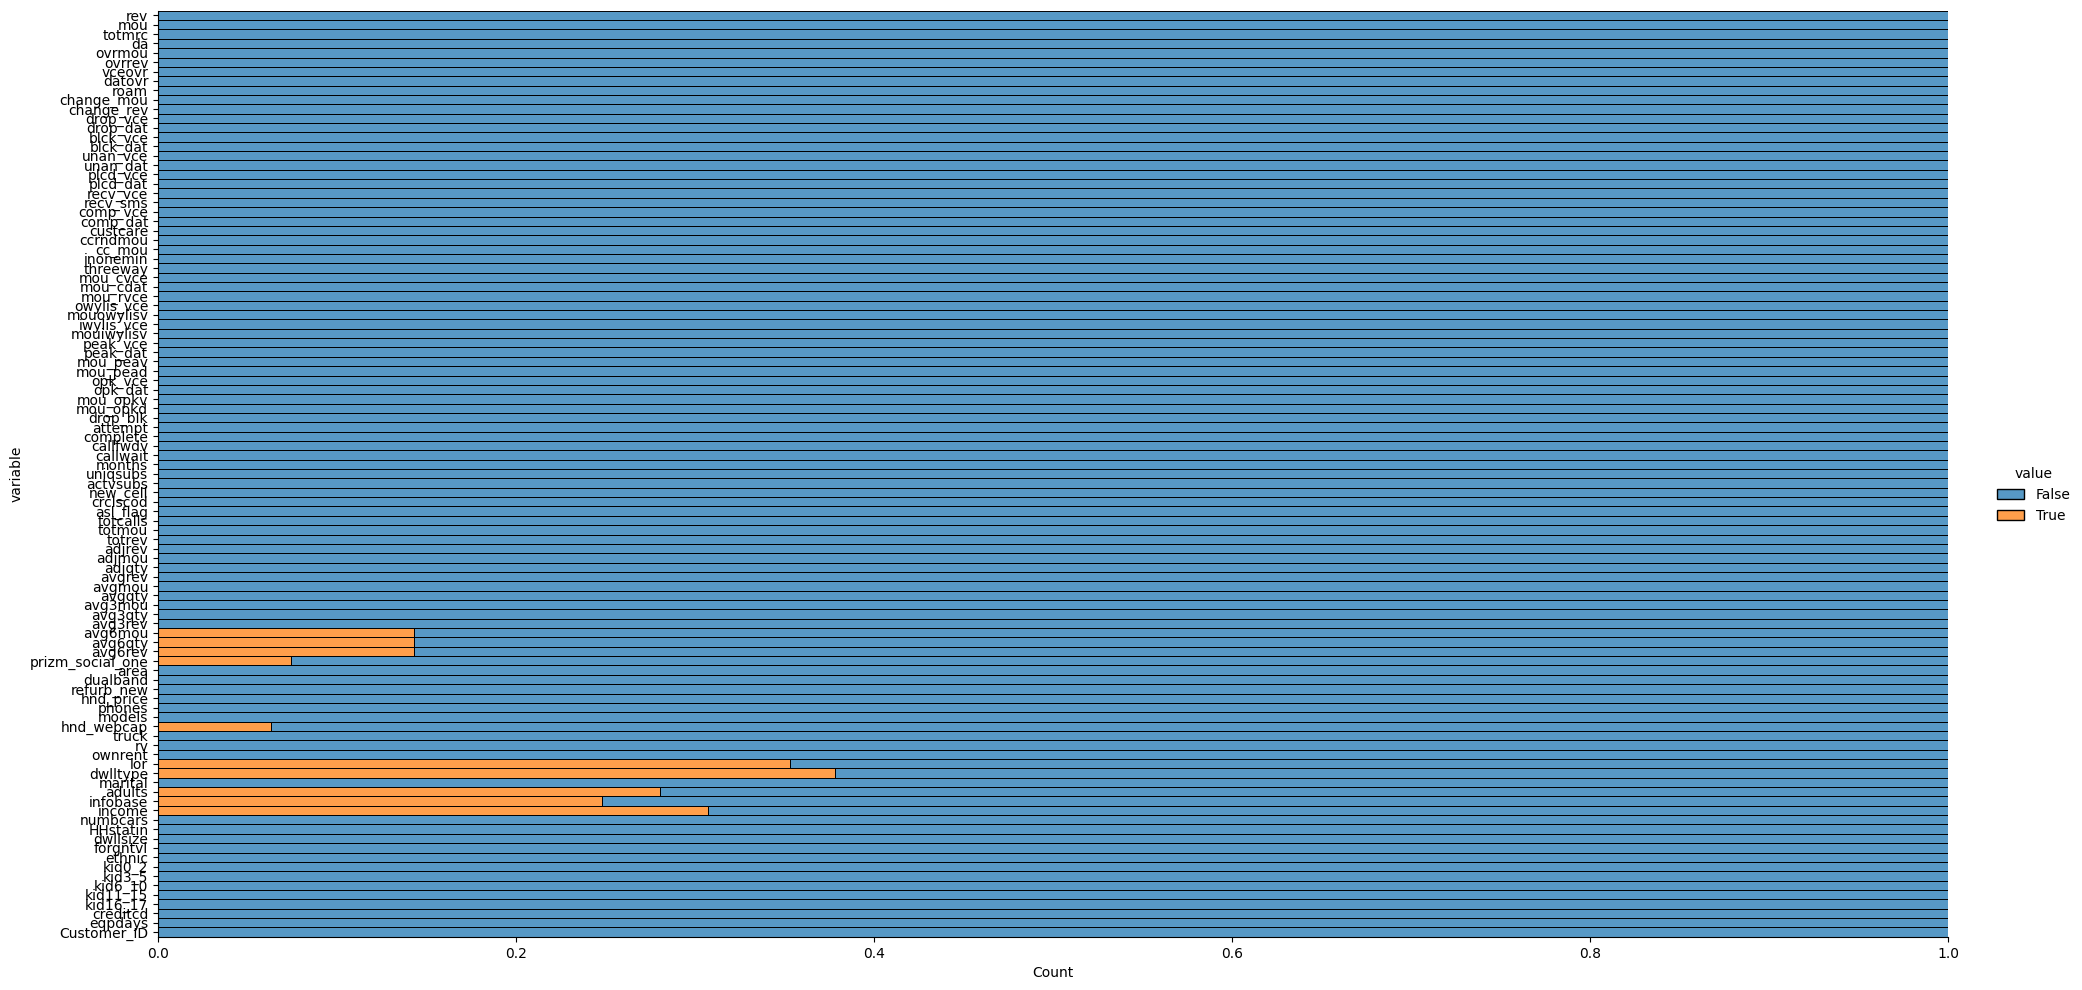

In [62]:
#Visualizamos la proporción de nulos existentes en nuestro Dataset
df_predecir.isnull().melt().pipe(lambda df_predecir: (sns.displot(
    data=df_predecir,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2, height=10
)));

Agrupo en una lista, mis variables que aun conservan nulos

In [73]:
variables_to_analyze = []
for i in df.columns:
    if (df[i].isnull().sum() / len(df)) > 0.03:
      variables_to_analyze.append(i)
      print(i)

prizm_social_one
hnd_webcap
lor
dwlltype
adults
income


In [78]:
analyze_variables(df, variables_to_analyze)

{'prizm_social_one': {'Unique values': array(['S', 'T', 'U', 'C', nan, 'R'], dtype=object),
  'Unique num values': 5,
  'Null values': np.int64(5755),
  'Value counts (normalized)': prizm_social_one
  S    0.350044
  U    0.250605
  C    0.181963
  T    0.164787
  R    0.052601
  Name: proportion, dtype: float64},
 'hnd_webcap': {'Unique values': array(['WCMB', nan, 'WC'], dtype=object),
  'Unique num values': 2,
  'Null values': np.int64(9253),
  'Value counts (normalized)': hnd_webcap
  WCMB    0.843072
  WC      0.156928
  Name: proportion, dtype: float64},
 'lor': {'Unique values': array([15.,  7.,  6.,  5.,  1.,  8.,  0.,  3.,  4., 11., 10., 13., nan,
          2., 14., 12.,  9.]),
  'Unique num values': 16,
  'Null values': np.int64(24140),
  'Value counts (normalized)': lor
  1.0     0.144760
  2.0     0.127507
  15.0    0.117407
  3.0     0.083564
  4.0     0.077624
  5.0     0.070017
  6.0     0.064109
  7.0     0.061390
  8.0     0.052343
  9.0     0.042405
  10.0    0.033244

In [ ]:
rellenar con proporcion  income 

In [75]:
variables_to_analyze_predecir = []
for i in df_predecir.columns:
    if (df_predecir[i].isnull().sum() / len(df_predecir)) > 0.03:
      variables_to_analyze_predecir.append(i)
      print(i)

avg6mou
avg6qty
avg6rev
prizm_social_one
hnd_webcap
lor
dwlltype
adults
income


In [76]:
analyze_variables(df, variables_to_analyze_predecir)

{'avg6mou': {'Unique values': array([ 322.,   11.,   50., ..., 2770., 3761., 2743.]),
  'Null values': np.int64(0),
  'Value counts (normalized)': avg6mou
  0.0       0.007774
  1.0       0.002374
  65.0      0.001874
  107.0     0.001874
  11.0      0.001862
              ...   
  2962.0    0.000012
  2403.0    0.000012
  2342.0    0.000012
  3283.0    0.000012
  1909.0    0.000012
  Name: proportion, Length: 2843, dtype: float64},
 'avg6qty': {'Unique values': array([ 136.,    6.,   25., ..., 1196.,  974., 1883.]),
  'Null values': np.int64(0),
  'Value counts (normalized)': avg6qty
  0.0       0.008461
  44.0      0.004725
  39.0      0.004690
  30.0      0.004655
  49.0      0.004644
              ...   
  2417.0    0.000012
  1728.0    0.000012
  1346.0    0.000012
  1398.0    0.000012
  1944.0    0.000012
  Name: proportion, Length: 1327, dtype: float64},
 'avg6rev': {'Unique values': array([ 38.,  17.,  40.,  80.,  78.,  58.,  90.,  34.,  64.,  36.,  76.,
          25., 182.,  4

Elimino la columna __infobase__ , ya que tiene un solo valor

In [65]:
# eliminamos porque solo 1 valor predomina
print(df["infobase"].value_counts(normalize=True)*100)
lista_eliminar = ['infobase']

infobase
M    100.0
Name: proportion, dtype: float64


In [66]:
for i in lista_eliminar:
  del(df[i])
  del(df_predecir[i])

# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

Creo una función para reemplaza los valores nulos según la proporción de las demás variables.

In [ ]:
# Funcion para completar nulos en proporcion a sus otros valores
def rellenar_nulos_proporcion(df, columna):
    # Obtener la distribución de valores no nulos
    distribucion = df[columna].value_counts(normalize=True)

    # Reemplazar valores nulos con una elección aleatoria basada en la distribución
    df[columna] = df[columna].apply(
        lambda x: np.random.choice(distribucion.index, p=distribucion.values) if pd.isnull(x) else x
    )

    return df

In [ ]:
#Lista que imputaré nulos con mi función creada
Lista_distribucion_proporciones = ["lor","dwlltype",'hnd_webcap','prizm_social_one','adults','income']

In [ ]:
for i in Lista_distribucion_proporciones:
  rellenar_nulos_proporcion(df, i)
  rellenar_nulos_proporcion(df_predecir,i)

In [ ]:
#df['adults'].isnull().sum()/len(df['adults'])*100

20.80302589467559

In [ ]:
#df['adults'].value_counts(normalize=True)*100

adults
2.0    30.151359
1.0    28.602498
3.0    17.750184
4.0    11.534166
5.0     6.296841
6.0     5.664952
Name: proportion, dtype: float64

In [ ]:
#df['income'].isnull().sum()/len(df['income'])*100

23.222577829502473

In [ ]:
#df['income'].value_counts(normalize=True)*100

income
6.0    25.295963
7.0    15.673554
9.0    14.832275
5.0    10.988161
4.0    10.392445
3.0     7.707932
8.0     6.927286
1.0     5.221991
2.0     2.960392
Name: proportion, dtype: float64

In [ ]:
df.shape

(85925, 88)

In [ ]:
df_predecir.shape

(10000, 87)

### Verificamos Outliers

### Separamos variables en numéricas y categóricas

In [ ]:
# separamos las variables categoricas y numericas
target=['churn']
def get_list_var(dataset):
    list_numbers=[]
    list_booleans=[]
    list_categories=[]

    for i in dataset:
      if (i not in target) and (dataset[i].dtype.kind == 'i' or dataset[i].dtype.kind == 'f') and (len(dataset[i].unique()) != 2):
        list_numbers.append(i)
      elif (i not in target) and (dataset[i].dtype.kind == 'b') and (len(dataset[i].unique())==2):
        list_booleans.append(i)
      elif (dataset[i].dtype.kind != 'o' and (i not in target)):
        list_categories.append(i)

    return list_numbers, list_booleans, list_categories

In [ ]:
l_numericas, l_booleanos, l_categoricas = get_list_var(df)

In [ ]:
l_numericas_pred, l_booleanos_pred, l_categoricas_pred = get_list_var(df_predecir)

### Graficamos las variables numéricas con scatterplot para identificar outliers y eliminamos las que son muy evidentes.

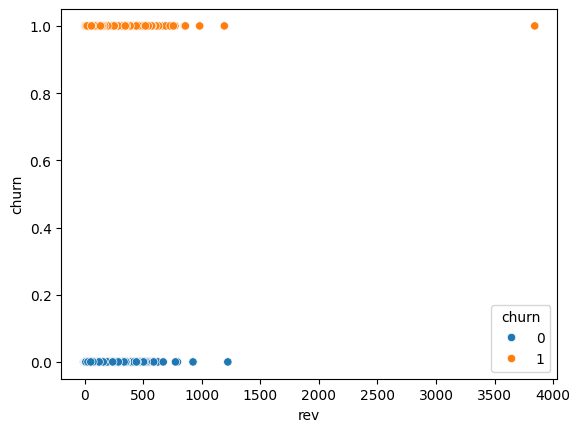

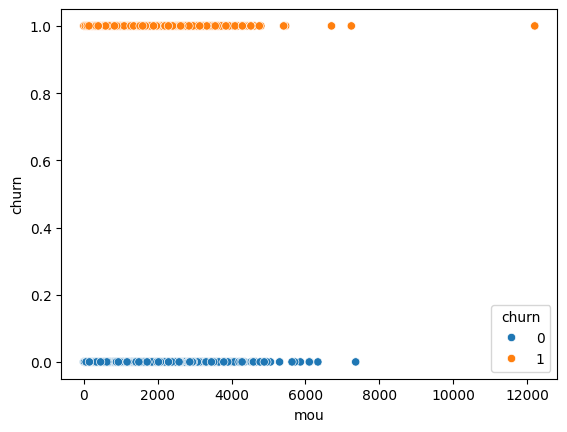

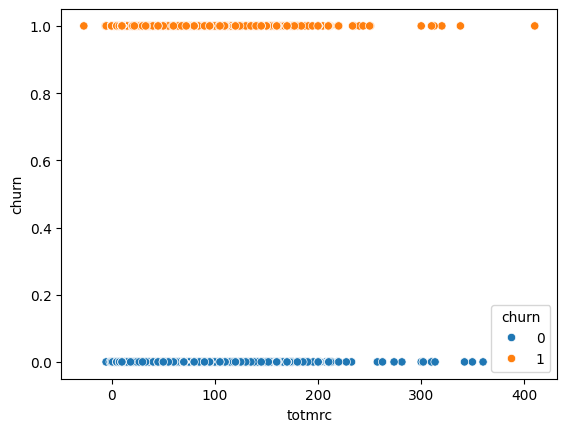

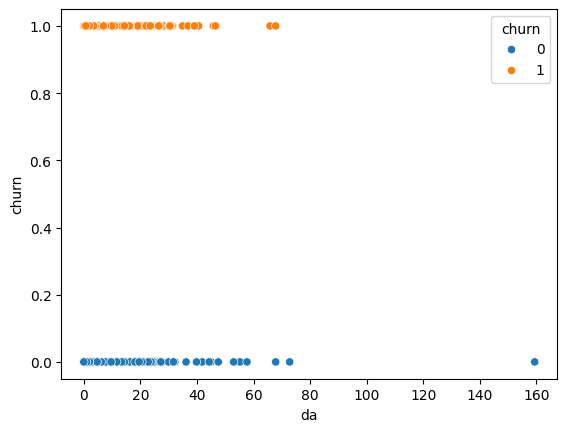

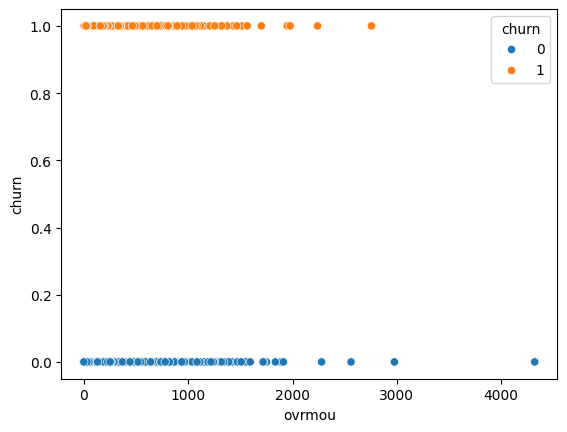

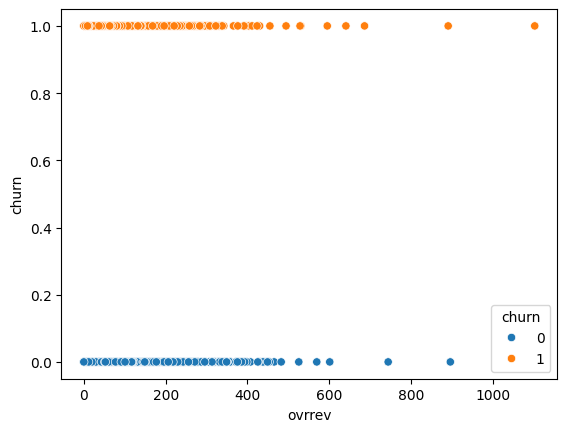

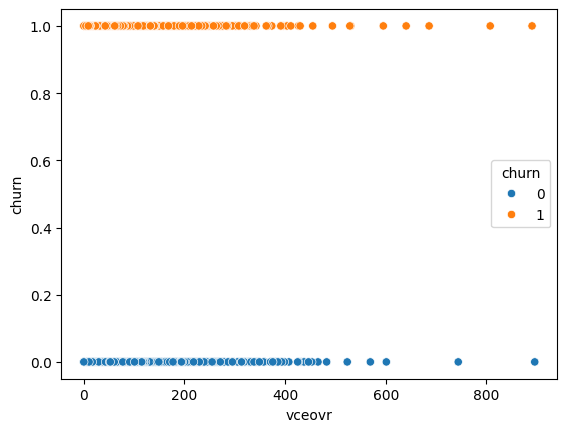

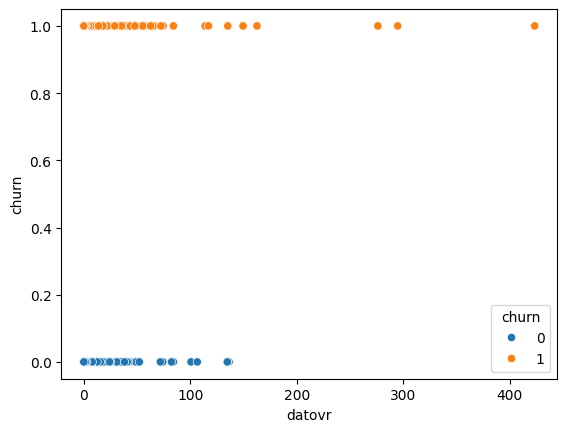

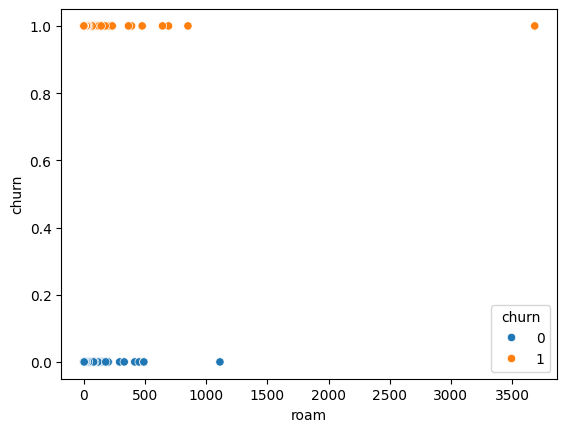

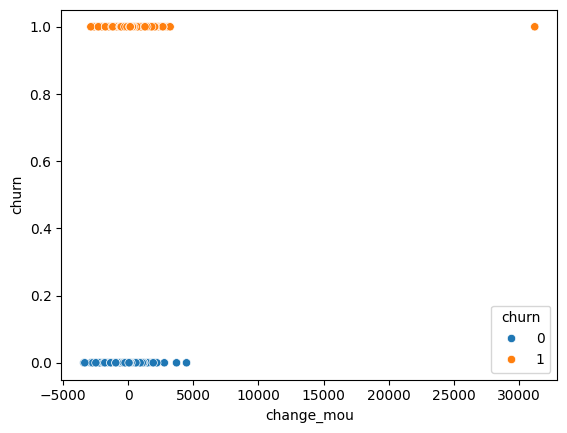

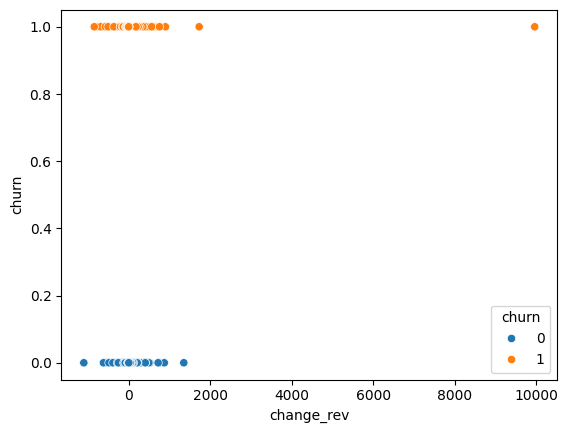

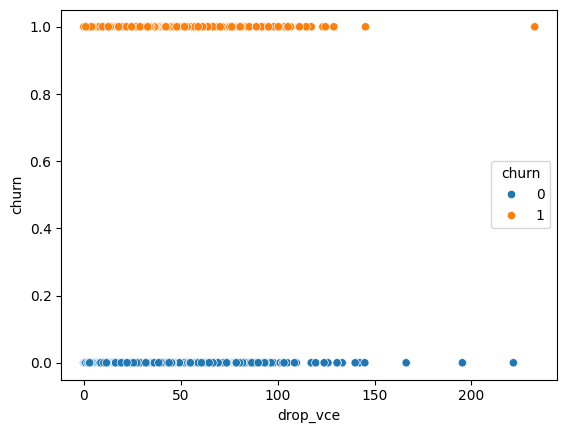

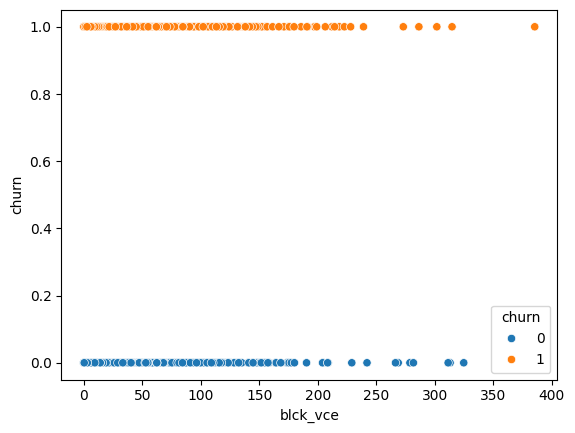

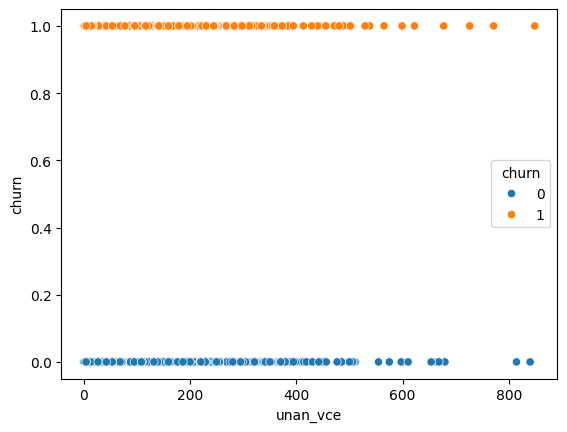

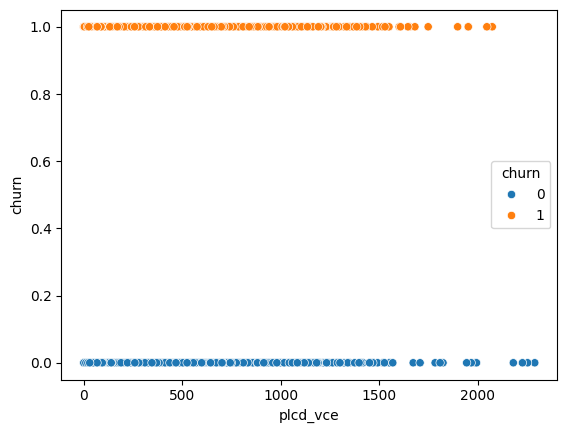

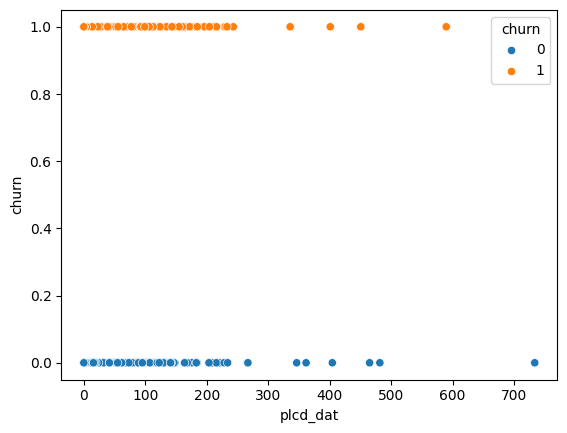

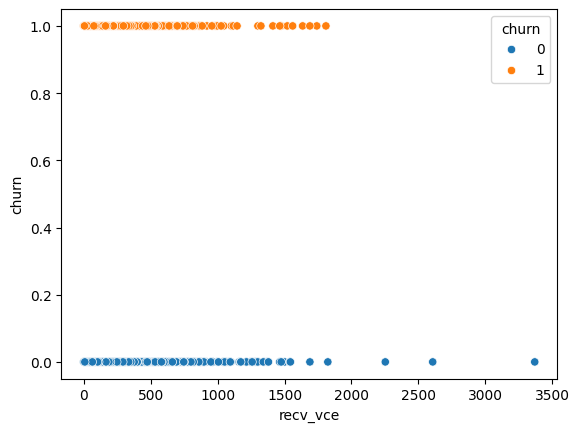

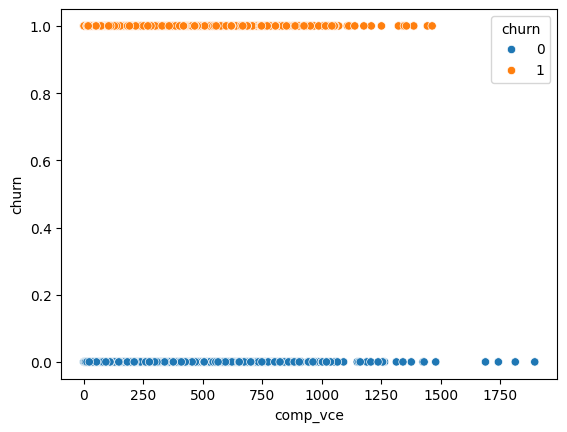

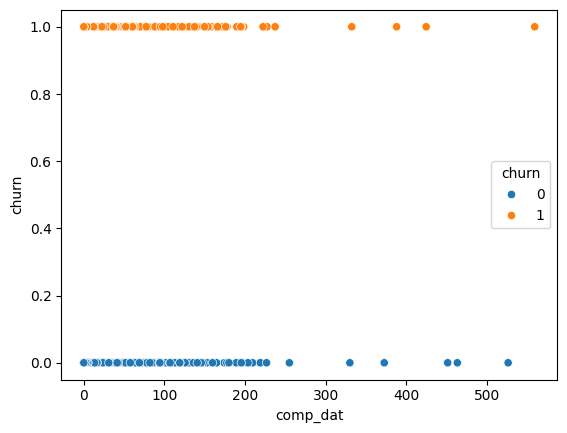

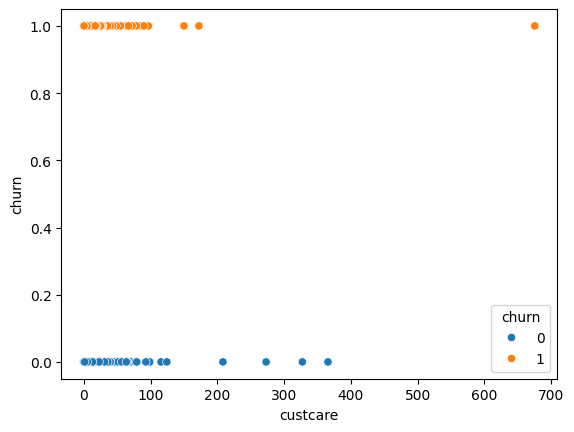

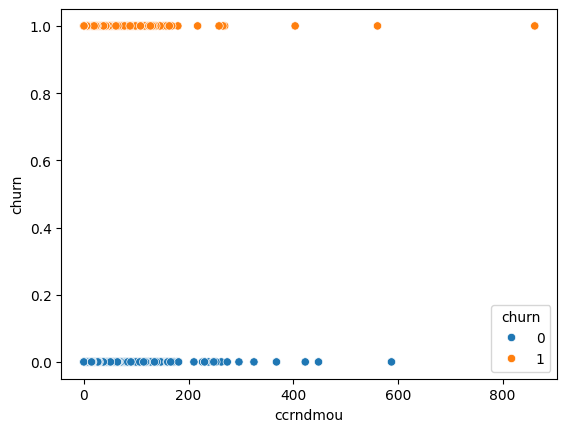

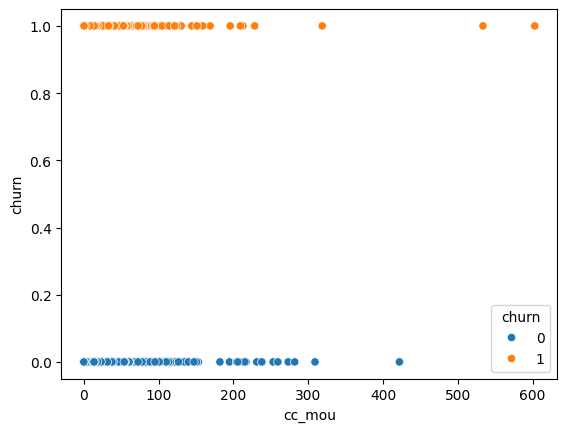

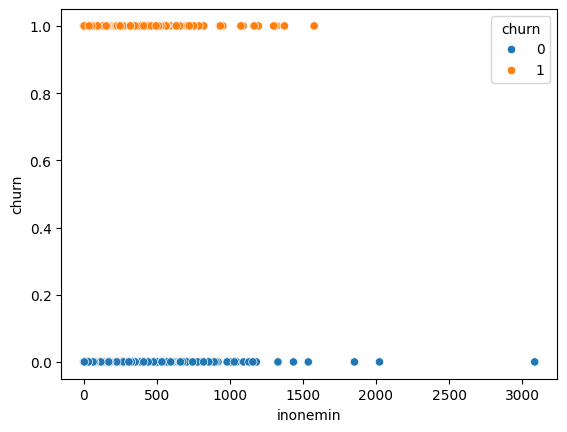

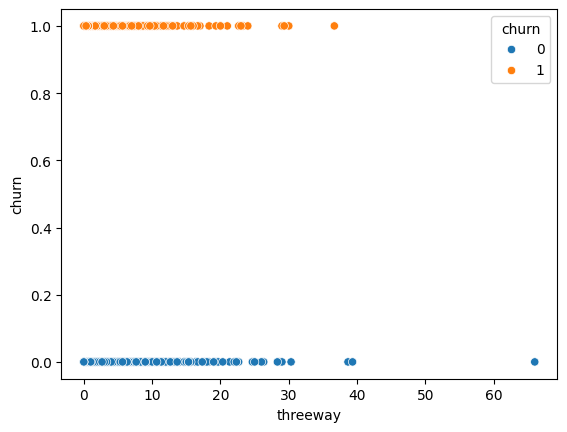

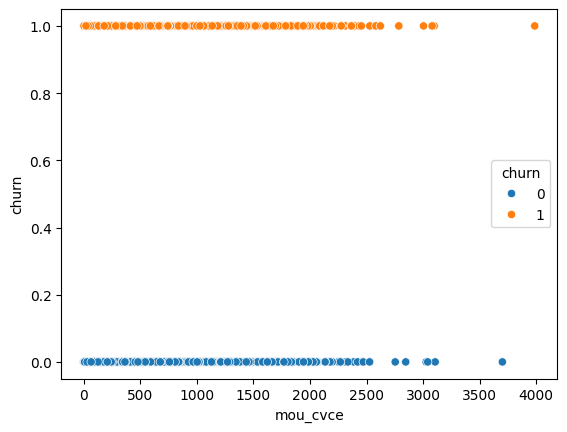

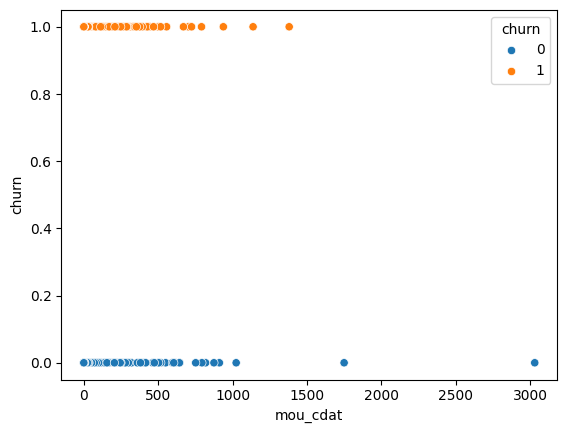

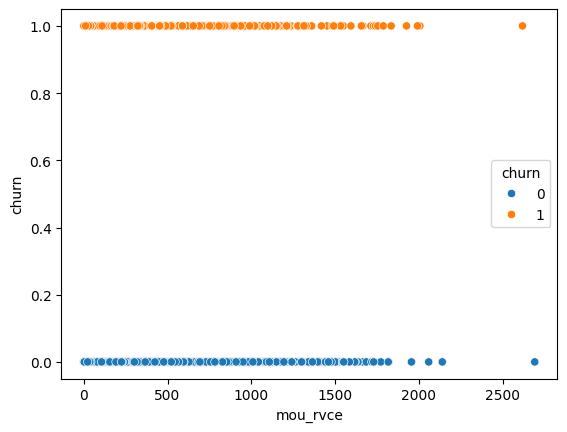

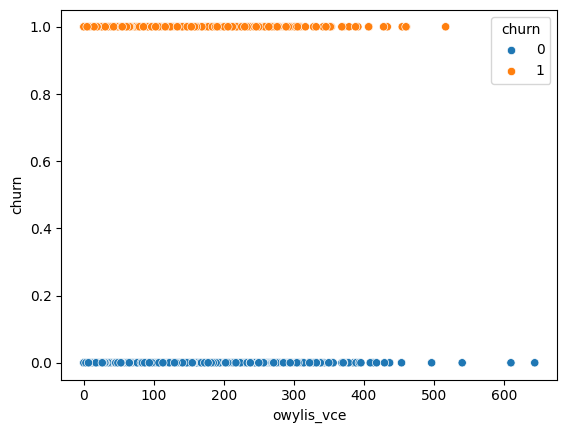

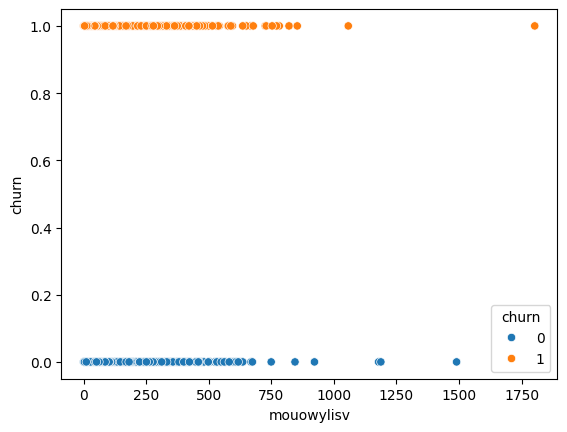

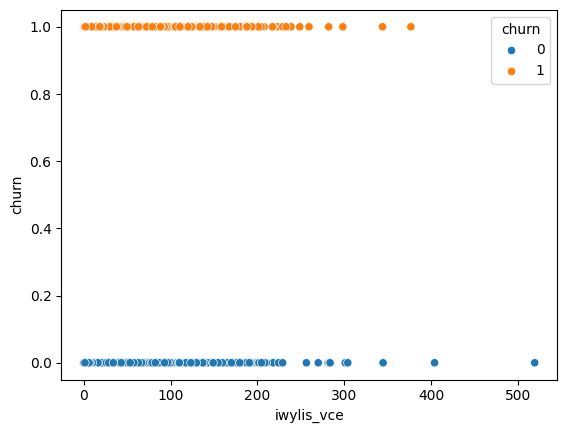

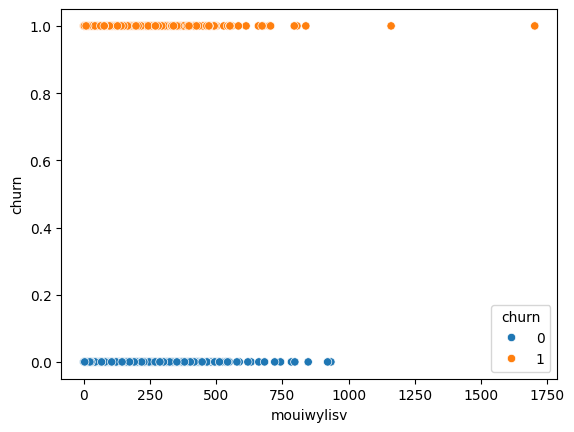

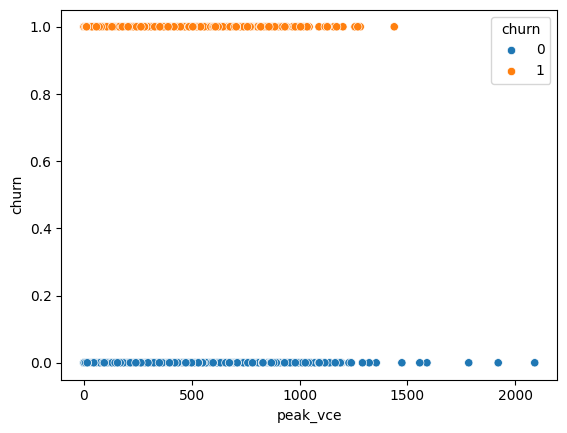

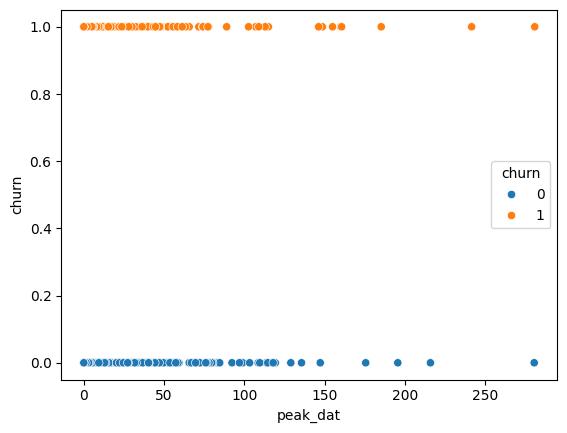

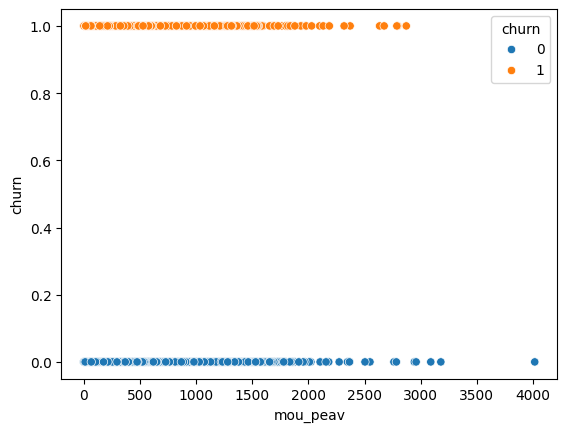

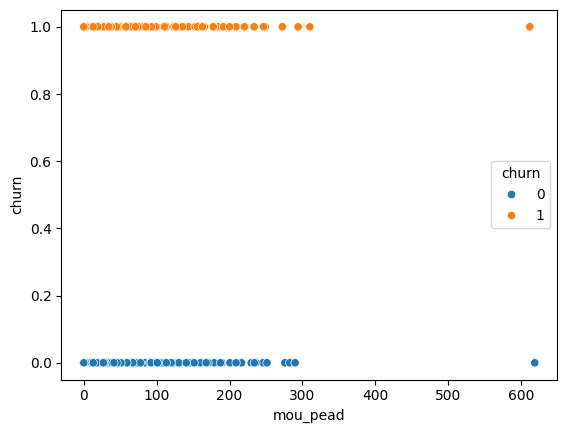

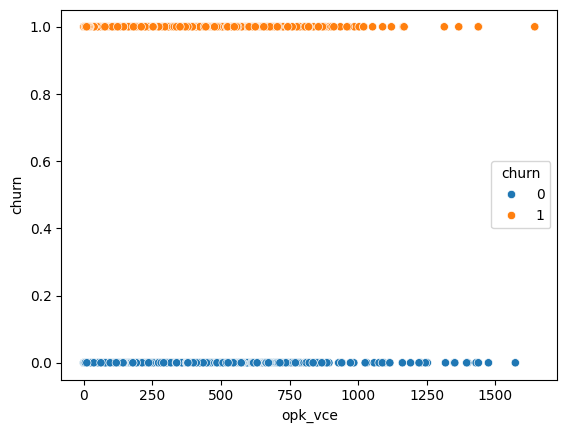

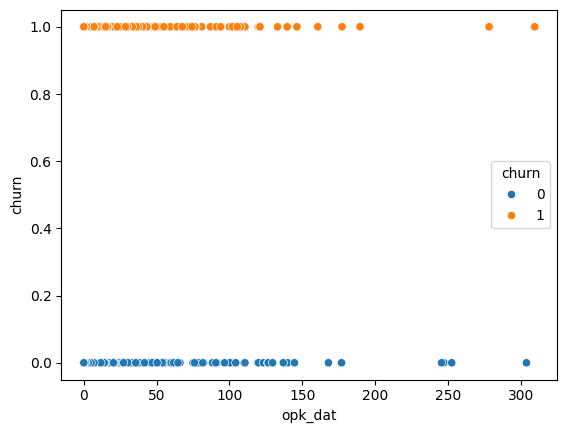

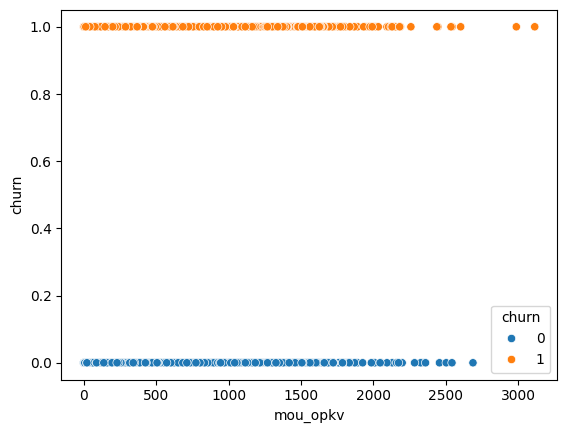

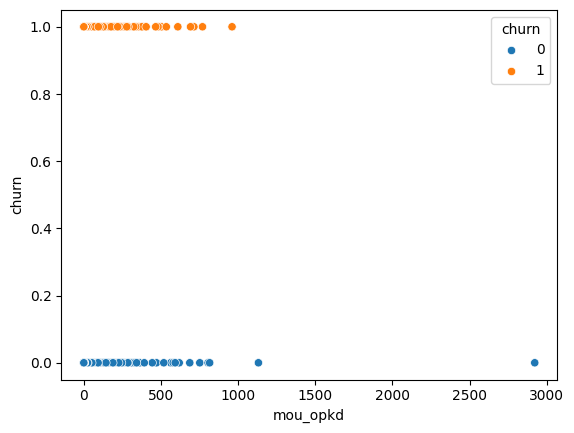

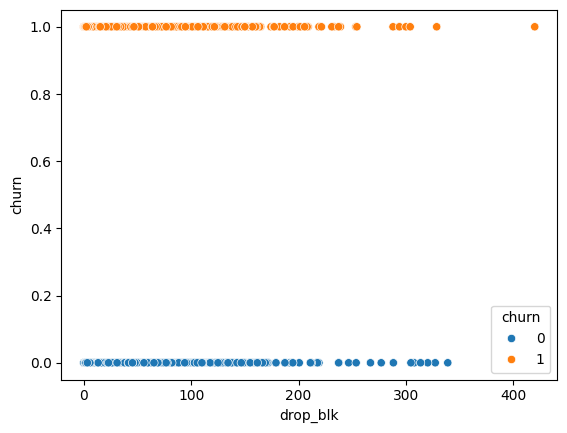

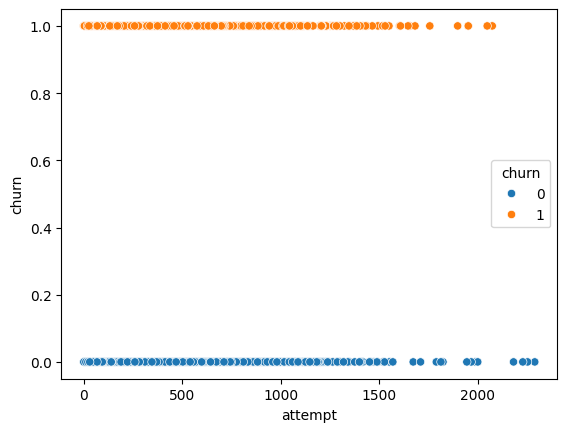

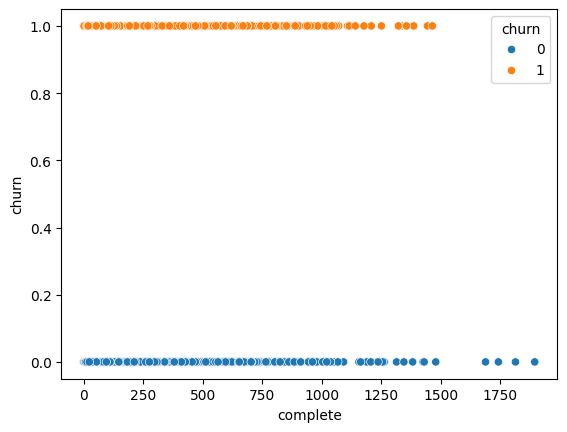

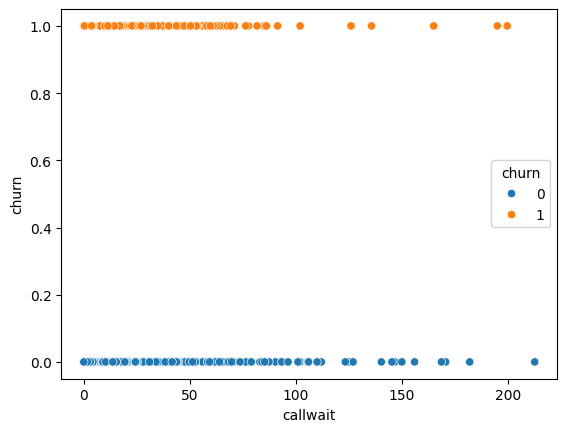

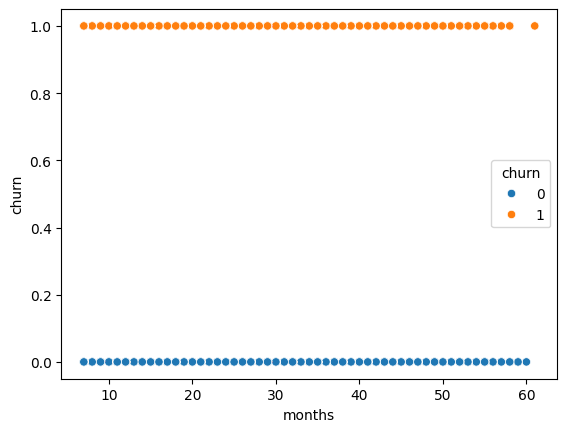

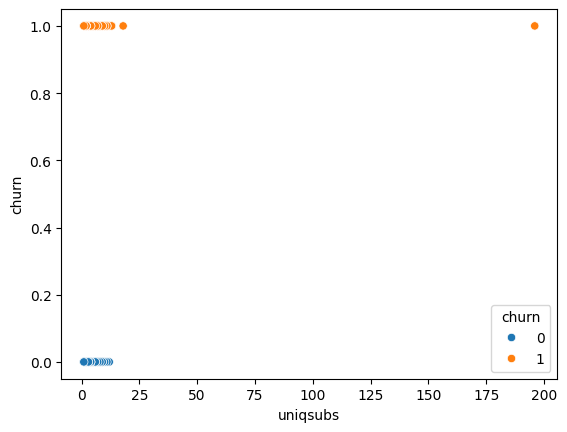

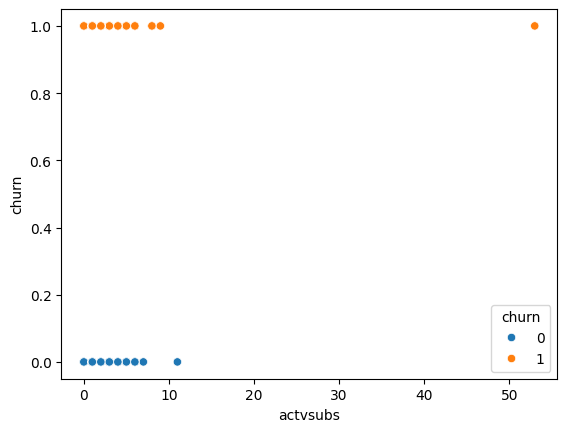

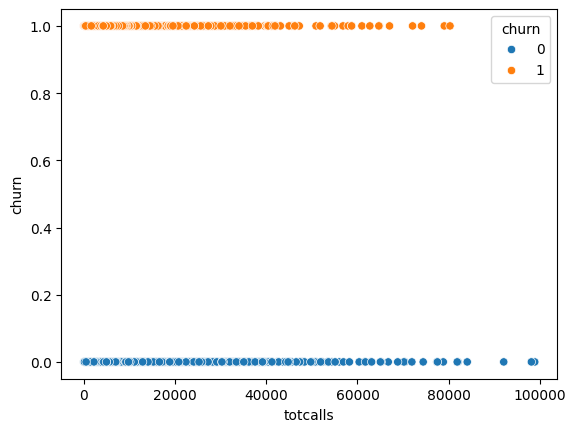

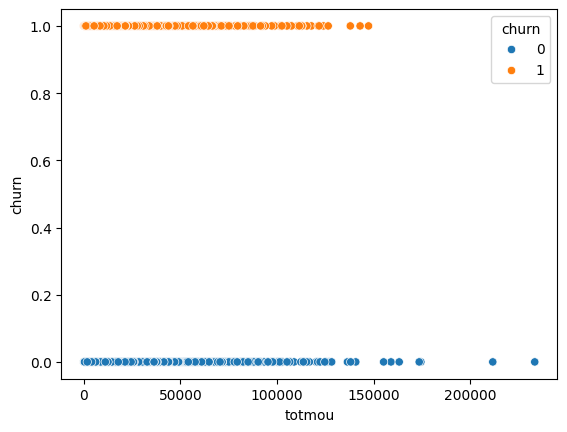

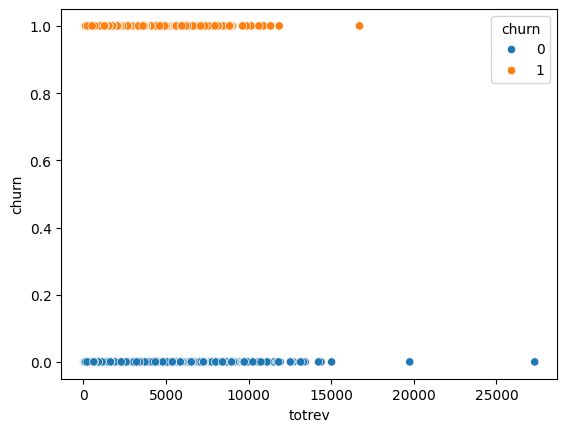

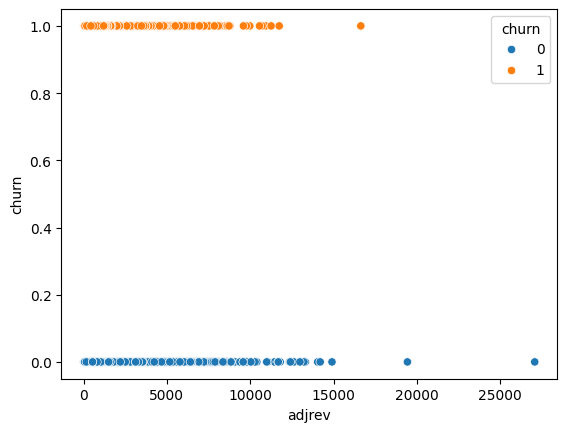

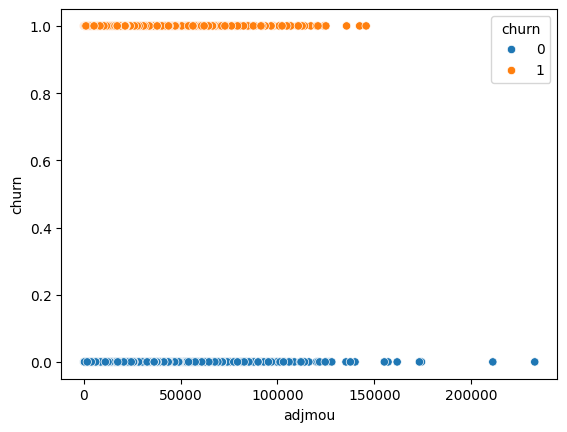

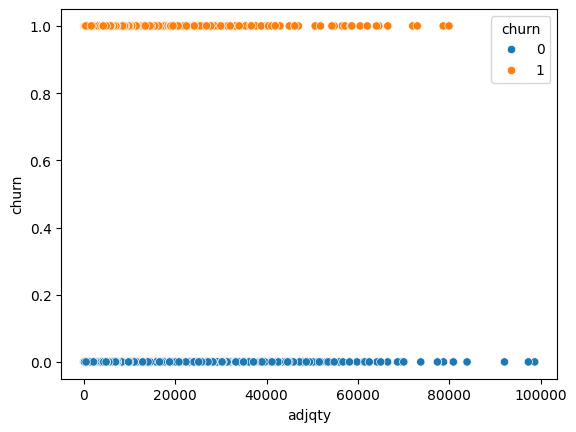

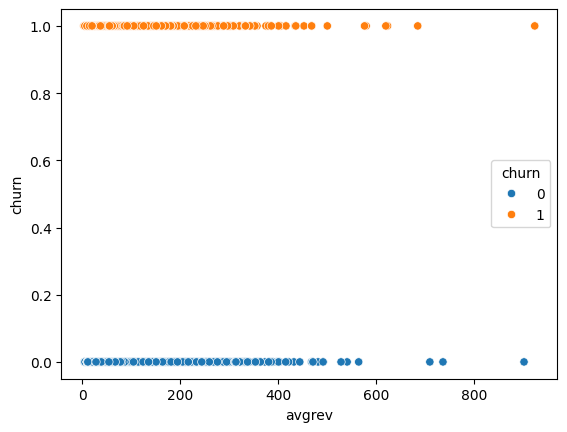

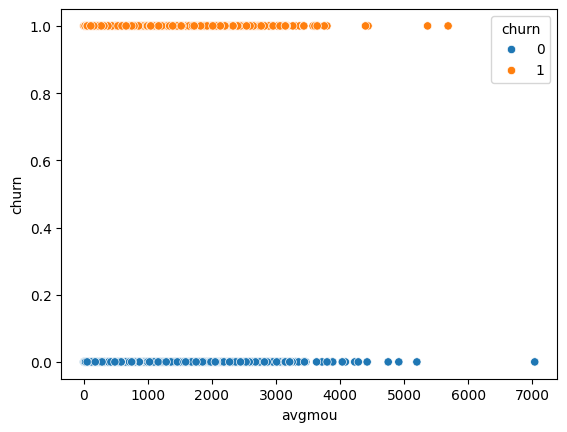

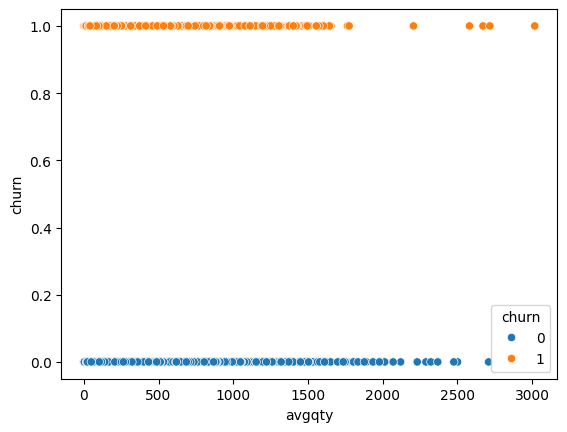

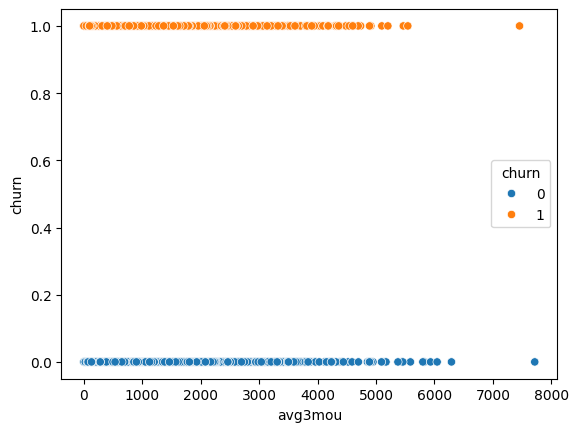

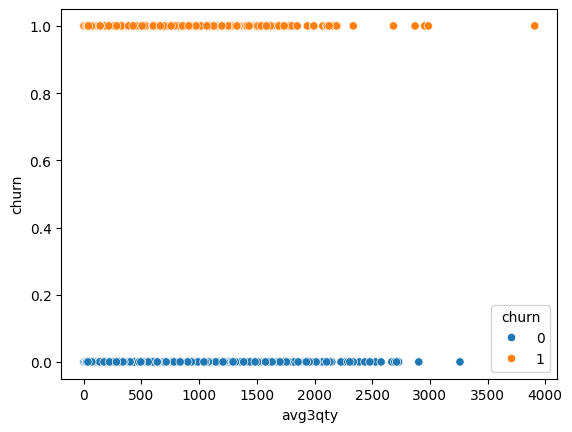

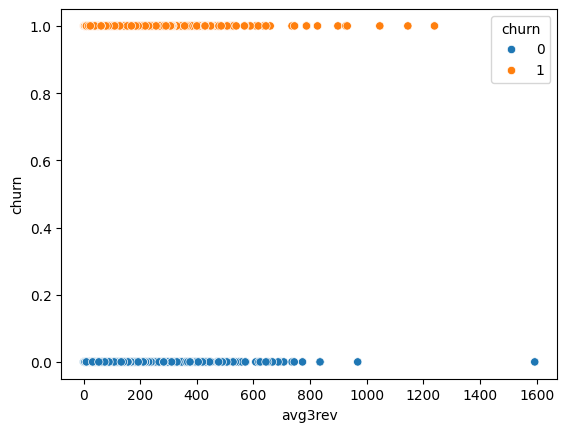

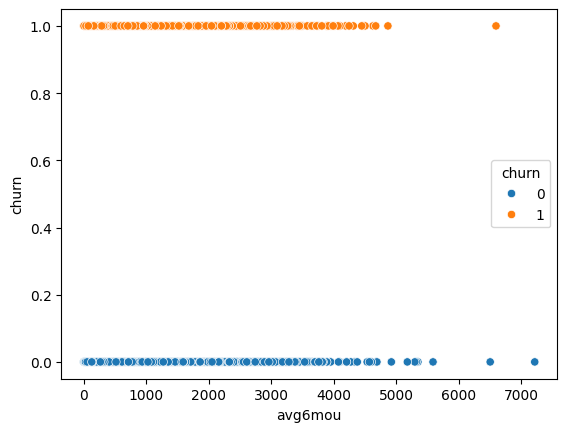

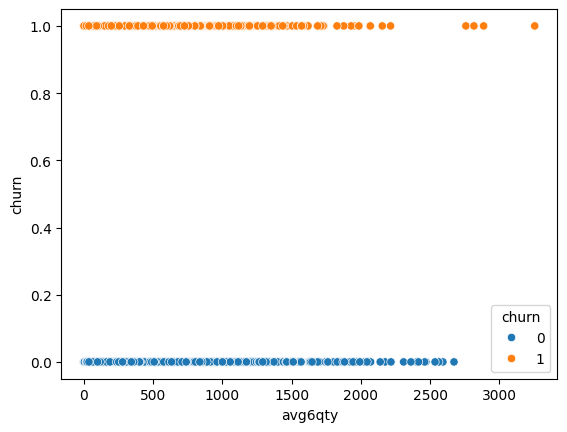

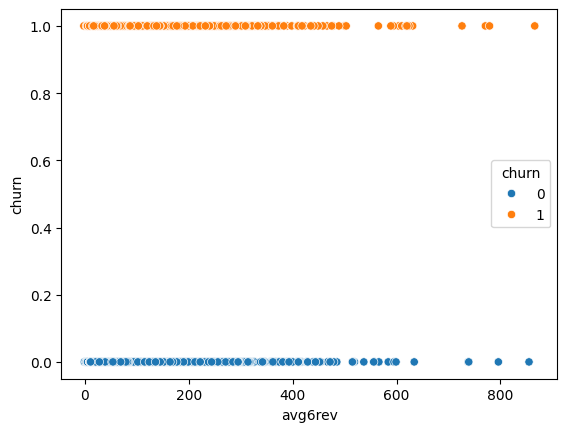

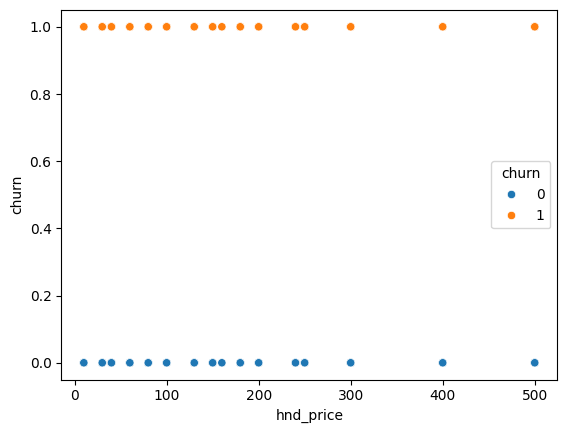

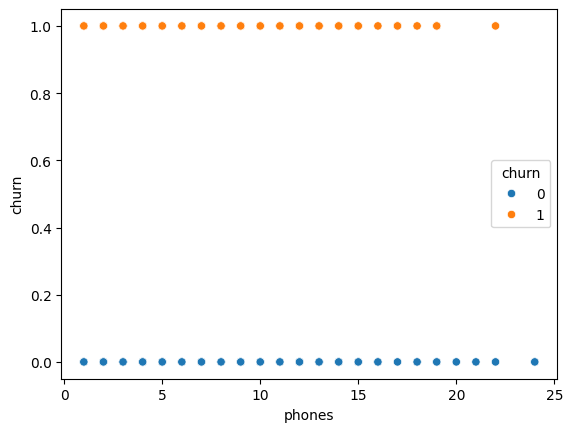

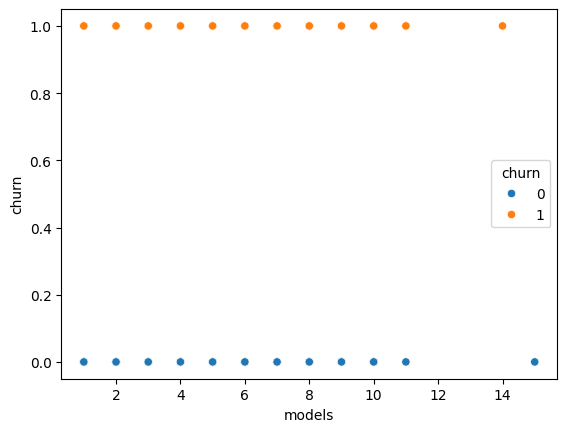

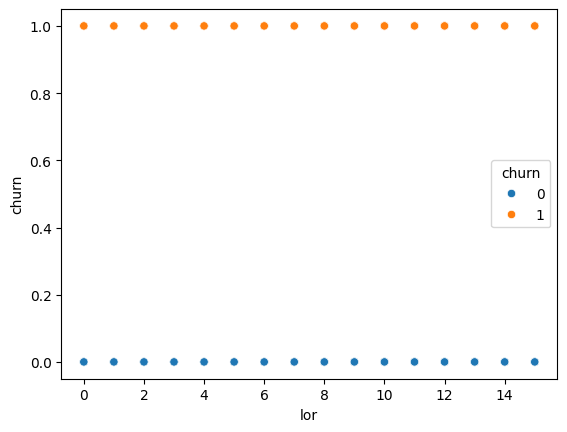

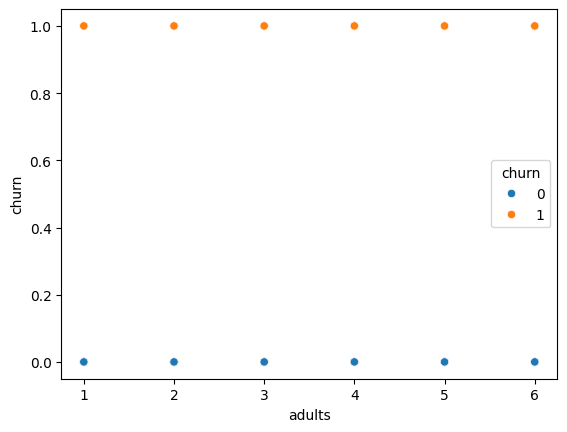

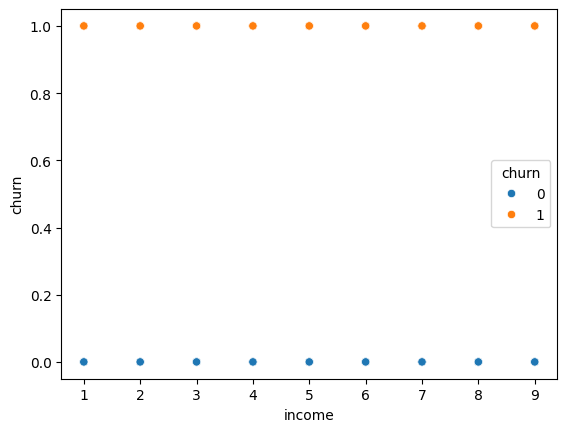

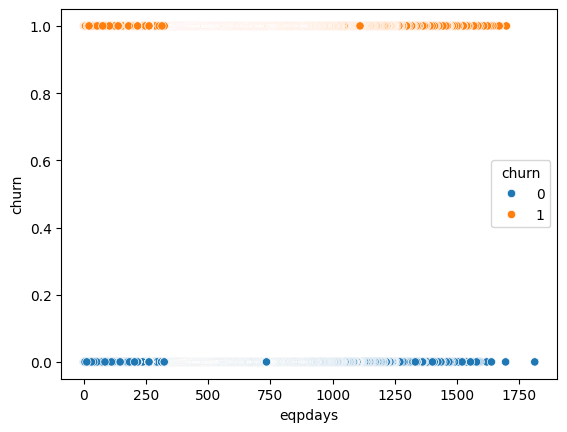

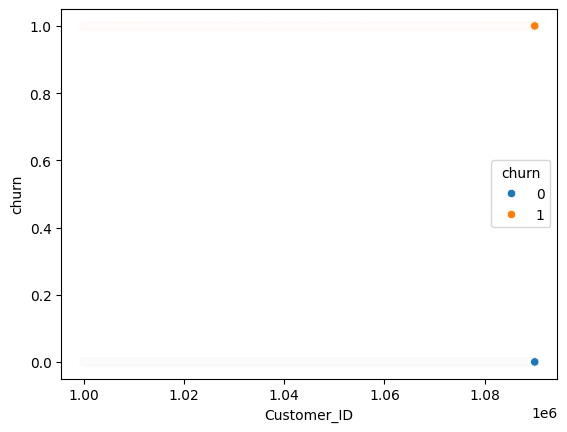

In [ ]:
for i in l_numericas:
    sns.scatterplot(data=df, x=i, y='churn', hue="churn")
    plt.show()

In [ ]:
df.drop(df[df['rev']>3500].index, inplace=True)

In [ ]:
df.drop(df[df['mou']>10000].index, inplace=True)

In [ ]:
df.drop(df[df['da']>100].index, inplace=True)

In [ ]:
df.drop(df[df['datovr']>200].index, inplace=True)

In [ ]:
df.drop(df[df['recv_vce']>2500].index, inplace=True)

In [ ]:
df.drop(df[df['custcare']>400].index, inplace=True)

In [ ]:
df.drop(df[df['threeway']>50].index, inplace=True)

In [ ]:
df.drop(df[df['mou_cdat']>2000].index, inplace=True)

In [ ]:
df.drop(df[df['mouowylisv']>1000].index, inplace=True)

In [ ]:
df.drop(df[df['iwylis_vce']>400].index, inplace=True)

In [ ]:
df.drop(df[df['mou_pead']>500].index, inplace=True)

In [ ]:
df.drop(df[df['uniqsubs']>50].index, inplace=True)

In [ ]:
df.drop(df[df['adjmou']>200000].index, inplace=True)

In [ ]:
df.drop(df[df['avg3qty']>3500].index, inplace=True)

In [ ]:
df.shape

(85839, 88)

# Inicio con mi correlación

### Hacemos las correlaciones.  Y creamos una función que vea que variables estan mas relacionadas entre si superior al 89% y a su vez la correlacion que tienen con el target. Una vez visto esto, nuestra funcion coge las dos variables relacionadas en un 90% o mas y de las dos elimina la que menos correlacion en valor absoluto tenga con el target


In [ ]:
corr = df.corr(numeric_only=True)

In [ ]:
# Filtrar las correlaciones mayores a 0.89
high_corr_pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.89]

# Obtener la correlación de todas las variables con "churn"
churn_corr = corr['churn']

# Crear la tabla de resultados
results = []

for (var1, var2), corr_value in high_corr_pairs.items():
    results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Correlation': corr_value,
        'Correlation with churn (Variable 1)': churn_corr.get(var1, np.nan),
        'Correlation with churn (Variable 2)': churn_corr.get(var2, np.nan)
    })

results_df = pd.DataFrame(results)

# Mostrar la tabla
print("Variables correlacionadas entre sí más de 0.89 y su relación con 'churn':")
print(results_df.to_string(index=False))

Variables correlacionadas entre sí más de 0.89 y su relación con 'churn':
Variable 1 Variable 2  Correlation  Correlation with churn (Variable 1)  Correlation with churn (Variable 2)
       rev    avg3rev     0.957368                            -0.016454                            -0.017911
       mou    avg3mou     0.984932                            -0.059142                            -0.051715
       mou    avg6mou     0.949630                            -0.059142                            -0.043716
    ovrmou     ovrrev     0.961383                             0.016552                             0.021104
    ovrmou     vceovr     0.959354                             0.016552                             0.021449
    ovrrev     vceovr     0.996930                             0.021104                             0.021449
  plcd_vce   comp_vce     0.985563                            -0.046259                            -0.049830
  plcd_vce    attempt     0.998562                    

In [ ]:
# Filtrar las correlaciones mayores a 0.90
high_corr_pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs.abs() > 0.90]

# Obtener la correlación de todas las variables con "churn"
churn_corr = corr['churn']

# Crear la lista de columnas a eliminar
columns_to_drop = set()

for (var1, var2), corr_value in high_corr_pairs.items():
    corr_with_churn_var1 = churn_corr.get(var1, np.nan)
    corr_with_churn_var2 = churn_corr.get(var2, np.nan)

    # Eliminar la columna con menor correlación absoluta con churn
    if abs(corr_with_churn_var1) > abs(corr_with_churn_var2):
        columns_to_drop.add(var2)
    else:
        columns_to_drop.add(var1)

La columna _Customer_ID_ se encuentra en la lista "columns_to_drop", así que la extraigo, ya que la necesito para ubicar mis clientes.

In [ ]:
columns_to_drop.remove('Customer_ID')


Elimino mis columnas

In [ ]:
for i in columns_to_drop:
    del(df[i])
    del(df_predecir[i])


In [ ]:
df.shape

(85839, 65)

In [ ]:
df_predecir.shape

(10000, 64)

In [ ]:
#df.var(numeric_only=True)

Creo 2 variables, una lista de objectos y otra de numéricos

In [ ]:
df_categoricas = list(df.describe(include=object).columns)

In [ ]:
df_numericas = list(df.describe(include=np.number).columns)

# Eliminar baja Varianza

Recorremos con un "for" todas las columnas numéricas y ninguna es menor al 1%

In [ ]:
for col in df_numericas:
  print(col)
  if col != 'churn' :
    print(df[col].var())
    if df[col].var()< 0.01:
      print('baja varianza')
  print('---------------')

mou
258342.97369312384
---------------
totmrc
538.5085744397144
---------------
da
4.294818445535567
---------------
vceovr
850.6825633988839
---------------
datovr
5.31382447995669
---------------
roam
86.04148382396603
---------------
change_mou
61309.4175792955
---------------
change_rev
1420.1141915587978
---------------
drop_vce
73.65645236927722
---------------
blck_vce
110.40510600730498
---------------
unan_vce
1363.1804462122145
---------------
plcd_dat
69.37020209889783
---------------
recv_vce
6944.4903839703165
---------------
custcare
21.220380745748074
---------------
ccrndmou
137.88639272932625
---------------
threeway
0.9234600137908051
---------------
mou_cvce
64989.31262195922
---------------
mou_cdat
302.06441916049306
---------------
mou_rvce
25080.579976428435
---------------
owylis_vce
1123.5376655971916
---------------
mouowylisv
2152.2668676950843
---------------
iwylis_vce
241.222650125582
---------------
mouiwylisv
1556.4035875223312
---------------
mou_peav
4

Recorro mi lista Categóricas

In [ ]:
for i in l_categoricas:
  print("<--------"+i+"---------->")
  print(df[i].unique())

<--------new_cell---------->
['U' 'Y' 'N']
<--------crclscod---------->
['A' 'C' 'B' 'BA' 'D' 'G' 'CA' 'AA' 'U' 'Z' 'E' 'EA' 'J' 'E4' 'W' 'DA' 'Y'
 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'K' 'B2' 'Z1' 'O' 'M' 'U1' 'Z4' 'A2'
 'V' 'I' 'TP' 'EM' 'C2' 'C5' 'Z5' 'D2' 'GY' 'ZY' 'E2' 'A3' 'V1' 'Z2' 'CY'
 'EC' 'P1' 'ZF' 'EF' 'IF']
<--------asl_flag---------->
['N' 'Y']
<--------prizm_social_one---------->
['S' 'T' 'U' 'C' 'R']
<--------area---------->
['NORTHWEST/ROCKY MOUNTAIN AREA' 'GREAT LAKES AREA' 'CHICAGO AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' 'LOS ANGELES AREA']
<--------dualband---------->
['Y' 'N' 'T']
<--------refurb_new---------->
['N' 'R']
<--------hnd_webcap---------->
['WCMB' 'WC']
<--------truck---------->
[0. 1.]
<--------

### Realizo una copia para poder regresar a la original al modificar u optimizar alguna variable

In [ ]:
df1 = df.copy()
df_predecir1 = df_predecir.copy()

Deespués de inspeccionar mis variables categóricas, decido agrupar los que tienen más datos en la lista "categoricas_borrar", para eliminarlas

In [ ]:
categoricas_borrar= ['ethnic','area','crclscod']

In [ ]:
for i in categoricas_borrar:
  del(df1[i])
  del(df_predecir1[i])

Creo dos lista nuevas, para separar los tipo booleanos y los no booleanos dentro de mis categóricas

In [ ]:
lista_bool = []
lista_no_bool = []
df_categorica2 = list(df1.describe(include=object).columns)
for i in df_categorica2:
  print(i)
  if len(df[i].unique()) == 2:
    lista_bool.append(i)
  else:
    lista_no_bool.append(i)

Por practicidad, transformo mis booleanas a 0 y 1 con "np.where"

In [ ]:
df1['creditcd']= np.where(df1['creditcd']=='N',0,1)
df1['kid16_17']= np.where(df1['kid16_17']=='U',0,1)
df1['kid11_15']= np.where(df1['kid11_15']=='U',0,1)
df1['kid6_10']= np.where(df1['kid6_10']=='U',0,1)
df1['dwlltype']= np.where(df1['dwlltype']=='M',0,1)
df1['hnd_webcap']= np.where(df1['hnd_webcap']=='WCMB',0,1)
df1['refurb_new']= np.where(df1['refurb_new']=='N',0,1)
df1['asl_flag']= np.where(df1['asl_flag']=='N',0,1)

In [ ]:
df_predecir1['creditcd']= np.where(df_predecir1['creditcd']=='N',0,1)
df_predecir1['kid16_17']= np.where(df_predecir1['kid16_17']=='U',0,1)
df_predecir1['kid6_10']= np.where(df_predecir1['kid6_10']=='U',0,1)
df_predecir1['kid11_15']= np.where(df_predecir1['kid11_15']=='U',0,1)
df_predecir1['dwlltype']= np.where(df_predecir1['dwlltype']=='M',0,1)
df_predecir1['hnd_webcap']= np.where(df_predecir1['hnd_webcap']=='WCMB',0,1)
df_predecir1['refurb_new']= np.where(df_predecir1['refurb_new']=='N',0,1)
df_predecir1['asl_flag']= np.where(df_predecir1['asl_flag']=='N',0,1)

Guardo mis "id" de mis clientes y lo elimino luego

In [ ]:
id_df1_movil = df1['Customer_ID']
id_df_predecir_movil = df_predecir1['Customer_ID']

In [ ]:
del(df1['Customer_ID'])
del(df_predecir1['Customer_ID'])

compruebo con un shape, el tamaño de mis datasets

In [ ]:
print(df1.shape)
print(df_predecir1.shape)

(85839, 61)
(10000, 60)


Revisando mi Dataset de Predicción, aún tengo nulos y los abordaré

In [ ]:
# TENEMOS NULOS EN DF_PREDICTION

#mou = minutos usados mensualmente
#totmrc= cargo recurrente mensual
#da = llamadas de asistencia
#veovr = venta por sobreuso de voz
#roam= roaming
#change_mou = cambio en los minutos usado mensualmente
#change_rev = cambio en ingresos
#avg6rev = promedio de ingreso de los ultimo 6 meses
#hnd_price=costo del equipo movil
#truck = indicador
#rv= indicador RV
#marital = estado civil
#forgntvl = viajes al extranjera
#creditcd = si tienen tarjeta y no


In [ ]:
list_nulos_prediccion=['mou','totmrc','da','vceovr','datovr','roam','change_mou','change_rev','avg6rev','hnd_price','truck','rv','marital','forgntvl','kid6_10','kid11_15','kid16_17','creditcd']

Comparo mis variables con la leyenda suministrada(diccionario) y evaluamos si puede tener alguna incidencia, por lo que creo una lista con los que eliminaré

In [ ]:
#remueve mis variables elegidas para eliminar de mi lists "list_nulos_prediccion"
list_nulos_prediccion.remove('rv')
list_nulos_prediccion.remove('truck')
list_nulos_prediccion.remove('forgntvl')
list_nulos_prediccion.remove('da')

In [ ]:
list_nulos_prediccion

['mou',
 'totmrc',
 'vceovr',
 'datovr',
 'roam',
 'change_mou',
 'change_rev',
 'avg6rev',
 'hnd_price',
 'marital',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [ ]:
lista_para_eliminar3 = ['rv','truck','forgntvl','da']
for i in lista_para_eliminar3:
  del(df_predecir1[i])
  del(df1[i])

Creo un diccionario para imputar los nulos en las columnas faltantes

In [ ]:
fill_criteria = {
    'mou':df1['mou'].median(),
    'totmrc': df1['totmrc'].median(),
    'vceovr': df1['vceovr'].median(),
    'datovr': df1['datovr'].mode()[0],
    'roam': df1['roam'].mode()[0],
    'change_mou': df1['change_mou'].mean(),
    'change_rev': df1['change_rev'].mean(),
    'avg6rev': df1['avg6rev'].mean(),
    'marital': df1['marital'].mode()[0],  # Usamos moda ya que marital es categórica}
    'hnd_price':df1['hnd_price'].mean(),
    'kid6_10': 0,
    'kid11_15': 0,
    'kid16_17': 0,
    'creditcd': df1['creditcd'].mode()[0]  # Usamos moda ya que creditcd es categórica
}

In [ ]:
# Rellenamos los valores nulos según el criterio especificado
for column, fill_value in fill_criteria.items():
    df_predecir1[column].fillna(fill_value, inplace=True)

In [ ]:
df1.shape

(85839, 57)

In [ ]:
df_predecir1.shape

(10000, 56)

In [ ]:
lista_no_bool

['new_cell', 'prizm_social_one', 'dualband', 'marital']

In [ ]:
#df1['dualband'].unique()
#df_predecir1['dualband'].unique()

array(['Y', 'N', 'T'], dtype=object)

# Encoding categóricos

In [ ]:
df1 = pd.get_dummies(data=df1, columns=lista_no_bool,dtype=int)

In [ ]:
df_predecir1 = pd.get_dummies(data=df_predecir1, columns=lista_no_bool,dtype=int)

In [ ]:
print(df1.shape)
print(df_predecir1.shape)

(85839, 69)
(10000, 69)


In [ ]:
df1['dualband_U']= [0]*len(df1)

In [ ]:
print(df1.shape)
print(df_predecir1.shape)

(85839, 70)
(10000, 69)


In [ ]:
#cambiar columnar, ojo

In [ ]:
# ponemos las columnas del dataset de predicción en el mismo orden que el de entrenamiento con reindex

columnas = df1.columns.drop('churn')
df_predecir1 = df_predecir1.reindex(columns=columnas)

In [ ]:
df2.head(1)

,mou,totmrc,vceovr,datovr,roam,change_mou,change_rev,drop_vce,blck_vce,unan_vce,plcd_dat,recv_vce,custcare,ccrndmou,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,mou_peav,mou_pead,opk_vce,mou_opkv,drop_blk,complete,callwait,churn,months,uniqsubs,actvsubs,asl_flag,adjrev,adjmou,avgrev,avg3qty,avg6rev,refurb_new,hnd_price,phones,models,hnd_webcap,lor,dwlltype,adults,income,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,new_cell_N,new_cell_U,new_cell_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,dualband_N,dualband_T,dualband_Y,marital_A,marital_B,marital_M,marital_S,marital_U,dualband_U
0,219.25,22.5,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.666667,6.333333,0.0,42.333333,0.0,0.0,0.0,90.643333,0.0,97.176667,0.0,0.0,0.0,0.0,132.6,0.0,24.0,55.22,1.333333,45.0,0.333333,1,61,2,1,0,1453.44,4085.0,29.66,116,38.0,0,149.98999,2.0,2.0,0,15.0,1,1.0,4.0,0,0,0,1,361.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
df_predecir2.head(1)

,mou,totmrc,vceovr,datovr,roam,change_mou,change_rev,drop_vce,blck_vce,unan_vce,plcd_dat,recv_vce,custcare,ccrndmou,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,mou_peav,mou_pead,opk_vce,mou_opkv,drop_blk,complete,callwait,months,uniqsubs,actvsubs,asl_flag,adjrev,adjmou,avgrev,avg3qty,avg6rev,refurb_new,hnd_price,phones,models,hnd_webcap,lor,dwlltype,adults,income,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,new_cell_N,new_cell_U,new_cell_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,dualband_N,dualband_T,dualband_Y,marital_A,marital_B,marital_M,marital_S,marital_U,dualband_U
0,136.75,29.99,0.5,0.0,0.0975,48.25,1.155,2.0,10.333333,13.333333,0.0,3.333333,1.333333,1.333333,0.333333,71.746667,0.0,5.406667,1.333333,0.713333,0.333333,0.473333,54.5,0.0,13.666667,22.653333,12.333333,40.666667,0.0,7,1,1,0,182.94,958.0,30.49,52,31.0,0,149.98999,1.0,1.0,0,5.0,0,1.0,3.0,0,0,0,1,216.0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
print(df1.shape)
print(df_predecir1.shape)

(85839, 70)
(10000, 69)


In [ ]:
df2 = df1.copy()
df_predecir2 = df_predecir1.copy()

# Eliminar alta correlación

In [ ]:
corr = df2.corr(numeric_only=True)

In [ ]:
# Filtrar las correlaciones mayores a 0.89
high_corr_pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.89]

# Obtener la correlación de todas las variables con "churn"
churn_corr = corr['churn']

# Crear la tabla de resultados
results = []

for (var1, var2), corr_value in high_corr_pairs.items():
    results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Correlation': corr_value,
        'Correlation with churn (Variable 1)': churn_corr.get(var1, np.nan),
        'Correlation with churn (Variable 2)': churn_corr.get(var2, np.nan)
    })

results_df = pd.DataFrame(results)

# Mostrar la tabla
print("Variables correlacionadas entre sí más de 0.89 y su relación con 'churn':")
print(results_df.to_string(index=False))

Variables correlacionadas entre sí más de 0.89 y su relación con 'churn':
Variable 1 Variable 2  Correlation  Correlation with churn (Variable 1)  Correlation with churn (Variable 2)
  complete    avg3qty     0.893068                            -0.049926                             -0.04587


In [ ]:
df2.to_csv('clean_train_test.csv', index=False)
df_predecir2.to_csv('clean_predict.csv', index=False)
print("Saved cleaned data")

Saved cleaned data


In [ ]:
# modelos
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# metricas
import sklearn.metrics as metrics

# hiperparametrizado
from sklearn.model_selection import GridSearchCV

# quitar alertas
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install catboost

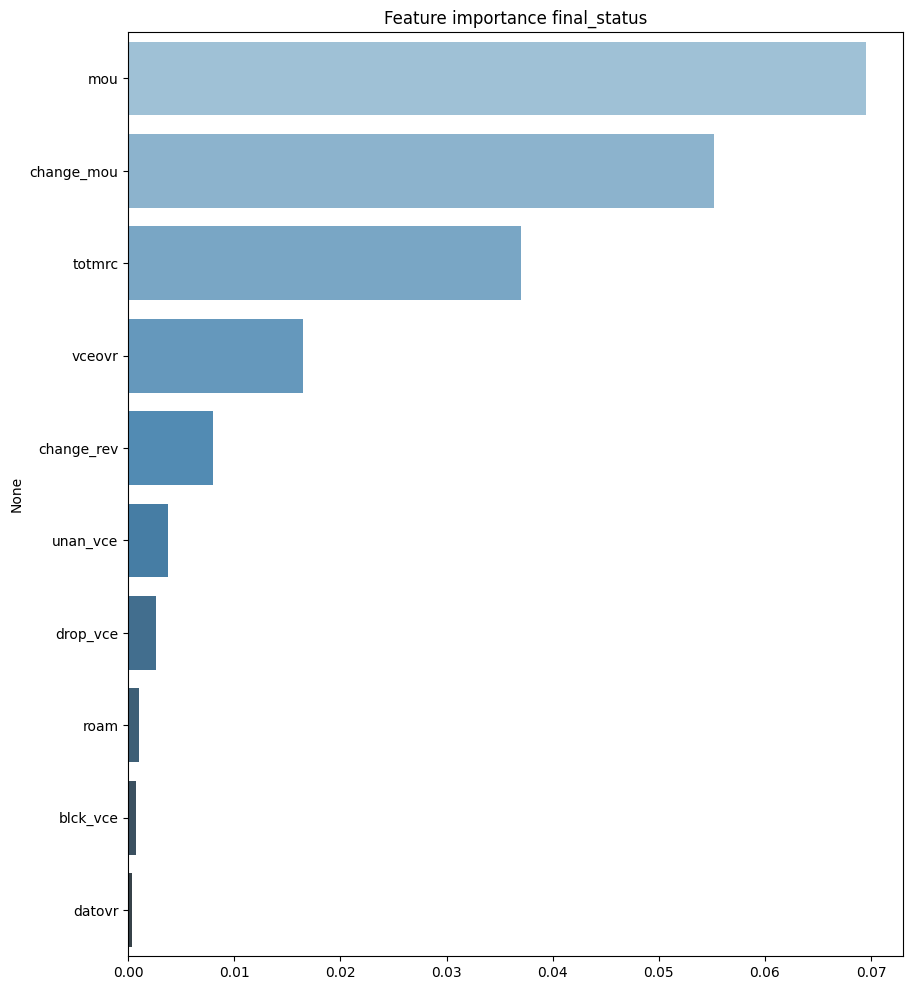

In [ ]:
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}

x, y = df2.drop('churn',axis=1), df2['churn']
# entrena un RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plotea las 10 mejores Features importances
features = clf.feature_importances_[:10]
columnas = x.columns[:10]
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance {}".format('final_status'))
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')
plt.show()

In [ ]:
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# se guarda la target como y y las features como X
y = df2['churn']
X = df2.drop('churn', axis=1)

# se guarda un 30% de datos para el test y un 70% para el train con train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(60087, 69)

In [ ]:
X_test.shape

(25752, 69)

In [ ]:
# se estandarizan las variables con StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # estandariza y define la regla de estandarización
X_test = scaler.transform(X_test)

In [ ]:
col_df_pred2 =df_predecir2.columns

In [ ]:
col_df2 = df2.columns

In [ ]:
df_predecir2.shape[1] == X.shape[1]

True

In [ ]:
# ya se pueden estandarizar las variables del dataset a predecir según la regla definida con el X_train con transform
df_predecir2 = scaler.transform(df_predecir2)

In [ ]:
def medicion(y_t, y_p):
  """imprime la curva ROC y el AUC"""

  # calculate the fpr and tpr for all thresholds of the classification
  fpr, tpr, threshold = metrics.roc_curve(y_t, y_p)
  roc_auc = metrics.auc(fpr, tpr)

  # para añadir el gráfico
  # method I: plt
  import matplotlib.pyplot as plt
  plt.figure(figsize=(8, 6))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  return roc_auc

In [ ]:
def entrenar(Xtrain, Xtest, ytrain, ytest):
  """entrena 6 módelos.
      imprime la curva roc de cada módelo junto al valor AUC
      devuelve un dataframe con los valores de AUC redondeados a 5 decimales para cada módelo"""

  # creamos la lista de auc vacía
  lista_aucs = []

  # Support Vector Machine
  print('Support Vector Machine')
  svclassifier = SVC(max_iter=20)

  svclassifier.fit(Xtrain, ytrain)
  y_pred = svclassifier.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('SVC', round(roc_auc, 5)))

  # Regresión logística
  print('Regresión logística')
  lr = LogisticRegression(max_iter=40)

  lr.fit(Xtrain, ytrain)
  y_pred = lr.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('regresión logística', round(roc_auc, 5)))

  # RidgeClassifier
  print('RidgeClassifier')
  rc = RidgeClassifier(max_iter=40)

  rc.fit(Xtrain, ytrain)
  y_pred = rc.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('RidgeClassifier', round(roc_auc, 5)))

  # Decision tree classsifier
  print('Decision tree classsifier')
  dt_base = DecisionTreeClassifier(random_state=42)

  dt_base.fit(Xtrain, ytrain)
  y_pred = dt_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('decision tree classifier', round(roc_auc, 5)))

  # Random forest
  print('Random forest')
  rf_base = RandomForestClassifier(random_state=42)

  rf_base.fit(Xtrain, ytrain)
  y_pred = rf_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('random forest', round(roc_auc, 5)))

  # Gradient boosting
  print('Gradient boosting')
  gbc_base = GradientBoostingClassifier(random_state=42)

  gbc_base.fit(Xtrain, ytrain)
  y_pred = gbc_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('gradient boosting', round(roc_auc, 5)))

  # XGBClassifier
  print('XGBClassifier')
  xgbc_base = XGBClassifier(random_state=42)

  xgbc_base.fit(Xtrain, ytrain)
  y_pred = xgbc_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('XGB classifier', round(roc_auc, 5)))

  # CatBoostClassifier
  print('CatBoostClassifier')
  cat_base = CatBoostClassifier(verbose=False, random_state=42)

  cat_base.fit(Xtrain, ytrain)
  y_pred = cat_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('CatBoost Classifier', round(roc_auc, 5)))

  df_aucs = pd.DataFrame(lista_aucs, columns=['modelos', 'AUC'])
  df_aucs = df_aucs.set_index('modelos')

  return df_aucs

Support Vector Machine


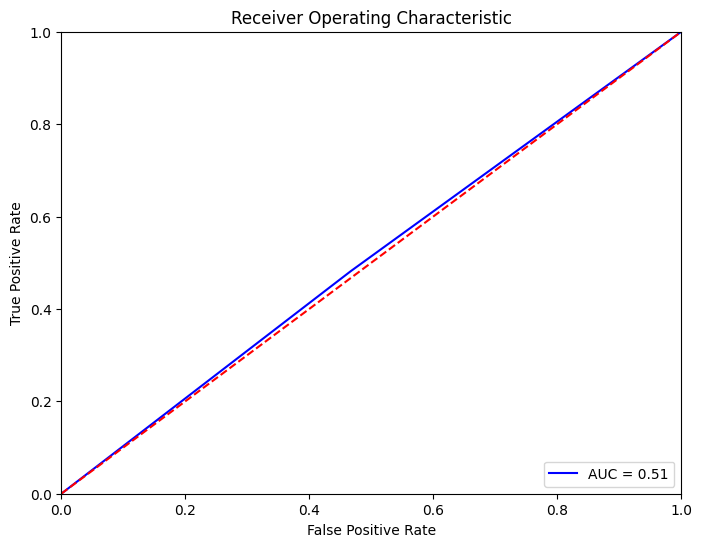

Regresión logística


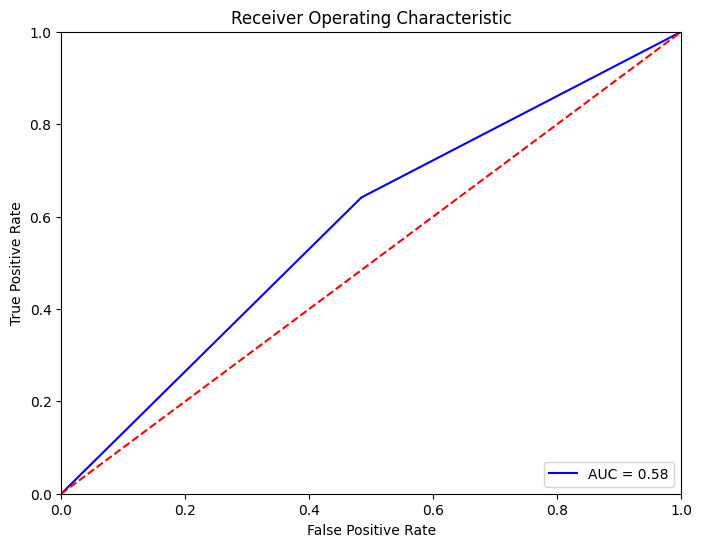

RidgeClassifier


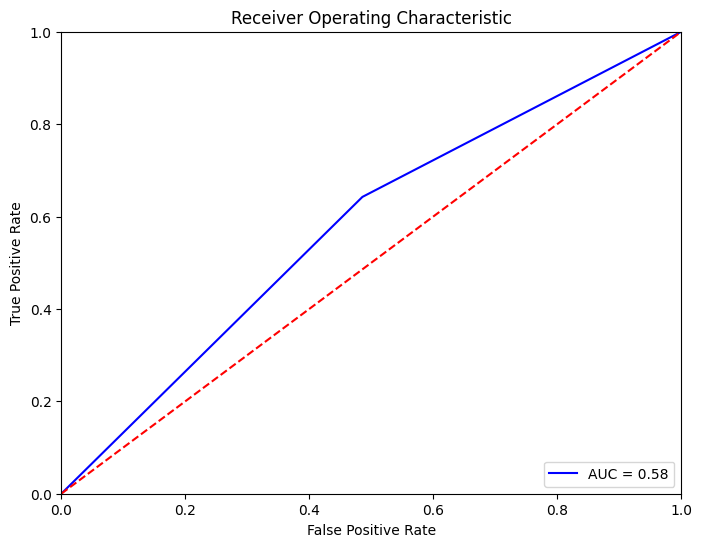

Decision tree classsifier


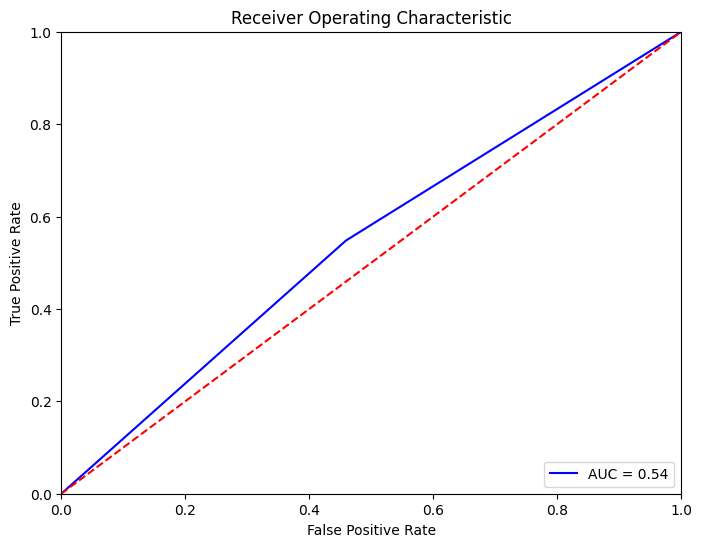

Random forest


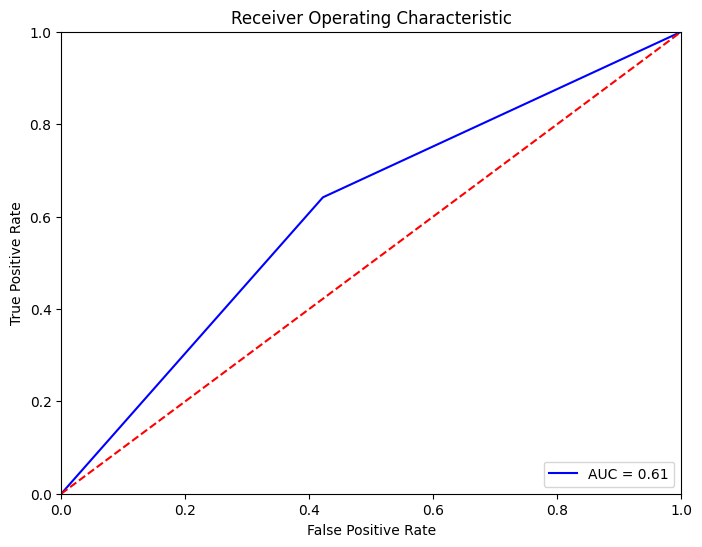

Gradient boosting


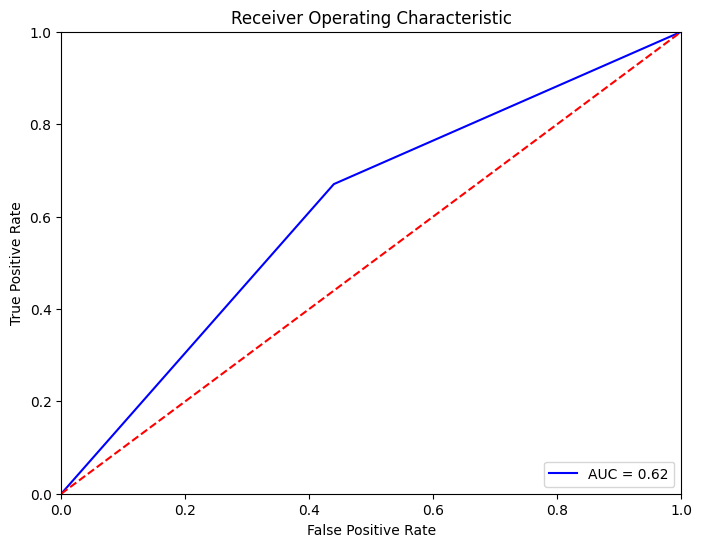

XGBClassifier


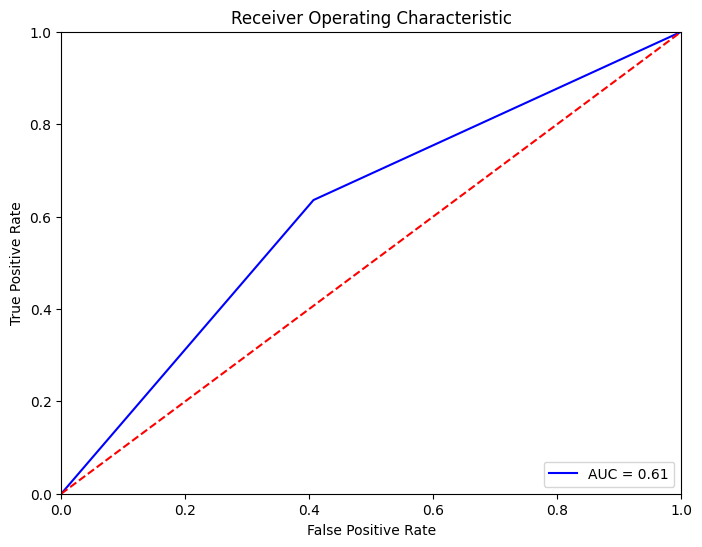

CatBoostClassifier


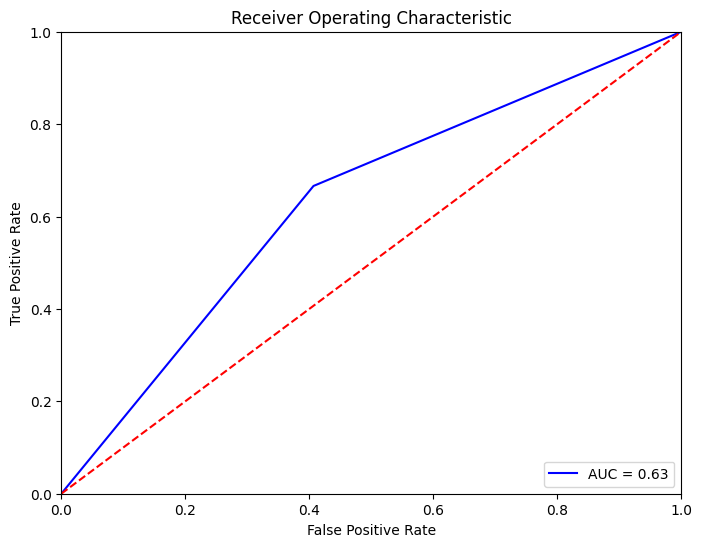

In [ ]:
aucs = entrenar(X_train, X_test, y_train, y_test)

In [ ]:
aucs

,AUC
modelos,
SVC,0.50741
regresión logística,0.57860
RidgeClassifier,0.57838
decision tree classifier,0.54442
random forest,0.60977
gradient boosting,0.61528
XGB classifier,0.61443
CatBoost Classifier,0.62966


In [ ]:
#Hiperpara
# gridsearch
parameters = {'learning_rate': [0.03, 0.05, 0.1, 0.15],
              'n_estimators': [100, 300, 500],
              'max_depth': [3, 4, 5],
              'max_leaf_nodes': [None, 2, 3]}

In [ ]:
cat_base = CatBoostClassifier()

In [ ]:
# se introducen los parametros del griedsearch
cat_base_test = CatBoostClassifier(learning_rate=0.1, random_state=42)

cat_base_test.fit(X_train, y_train)
y_pred = cat_base_test.predict(X_test)

0:	learn: 0.6888019	total: 69.1ms	remaining: 1m 9s
1:	learn: 0.6847328	total: 134ms	remaining: 1m 6s
2:	learn: 0.6818760	total: 205ms	remaining: 1m 8s
3:	learn: 0.6796348	total: 279ms	remaining: 1m 9s
4:	learn: 0.6779702	total: 365ms	remaining: 1m 12s
5:	learn: 0.6760098	total: 447ms	remaining: 1m 14s
6:	learn: 0.6742097	total: 537ms	remaining: 1m 16s
7:	learn: 0.6727309	total: 608ms	remaining: 1m 15s
8:	learn: 0.6714791	total: 674ms	remaining: 1m 14s
9:	learn: 0.6701515	total: 749ms	remaining: 1m 14s
10:	learn: 0.6691197	total: 817ms	remaining: 1m 13s
11:	learn: 0.6678059	total: 918ms	remaining: 1m 15s
12:	learn: 0.6669508	total: 966ms	remaining: 1m 13s
13:	learn: 0.6660166	total: 1.01s	remaining: 1m 10s
14:	learn: 0.6651872	total: 1.07s	remaining: 1m 10s
15:	learn: 0.6643027	total: 1.14s	remaining: 1m 9s
16:	learn: 0.6635242	total: 1.23s	remaining: 1m 11s
17:	learn: 0.6627093	total: 1.3s	remaining: 1m 10s
18:	learn: 0.6620406	total: 1.4s	remaining: 1m 12s
19:	learn: 0.6613239	total: 

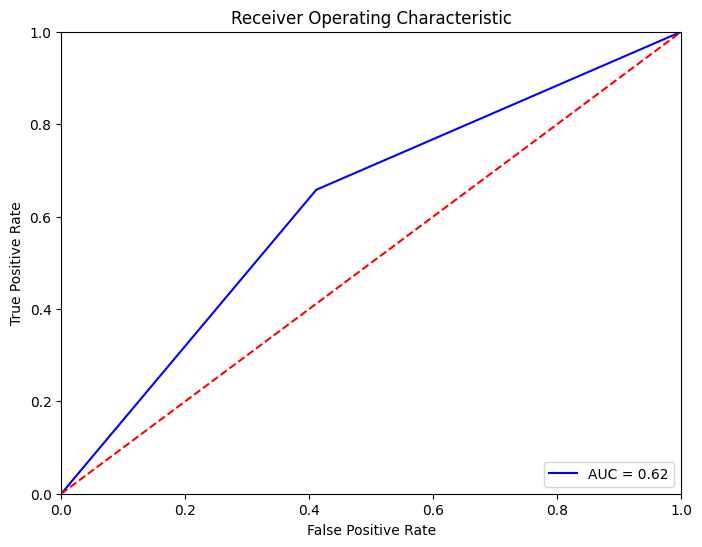

0.6232982486588886


In [ ]:
roc_auc = medicion(y_test, y_pred)
print(roc_auc)

In [ ]:
pred = cat_base_test.predict(df_predecir2)
pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
pred_proba = cat_base_test.predict_proba(df_predecir2)
pred_proba

array([[0.77621494, 0.22378506],
       [0.42588716, 0.57411284],
       [0.9029928 , 0.0970072 ],
       ...,
       [0.61719926, 0.38280074],
       [0.51372196, 0.48627804],
       [0.86867323, 0.13132677]])

In [ ]:
df = pd.DataFrame(pred_proba, columns=['False', 'True'])

In [ ]:
df

,False,True
0,0.776215,0.223785
1,0.425887,0.574113
2,0.902993,0.097007
3,0.534227,0.465773
4,0.862632,0.137368
...,...,...
9995,0.559802,0.440198
9996,0.505706,0.494294
9997,0.617199,0.382801
9998,0.513722,0.486278


# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()